In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import UnivariateAnalysis, StatisticAnalysis, BivariateAnalysis



In [329]:
import statsmodels
import re

In [330]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector


In [333]:
from sklearn.tree import DecisionTreeClassifier

In [334]:
from xgboost import XGBClassifier

In [335]:
from catboost import CatBoostClassifier



In [336]:
import lightgbm as lgb

In [337]:
from lightgbm import LGBMClassifier

In [338]:
from sklearn.metrics import mean_squared_error

In [339]:
from sklearn.metrics import roc_auc_score

In [340]:
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string

In [341]:
import scorecardpy as sc

In [342]:
import mlxtend

In [343]:
pd.set_option('display.max_columns', None)  

In [344]:
pd.set_option('display.max_colwidth', None)

In [345]:
train = pd.read_csv(r'C:\Users\swift\Downloads\train.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [346]:
train["credit_card_default"].value_counts(normalize=True)

credit_card_default
0    0.918797
1    0.081203
Name: proportion, dtype: float64

In [347]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# EDA

In [348]:
univariate_train = UnivariateAnalysis(df)
bivariate_train = BivariateAnalysis()
stat = StatisticAnalysis(df)

In [349]:
# check shape and length
print(df.shape)

(30000, 19)


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

## cat feats - num feats

In [351]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))

no of cat feats:  6
no of num feats:  13


In [352]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [353]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [354]:
df.duplicated().sum()

0

## isnull()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   369
owns_house                   0
no_of_children             502
net_yearly_income            0
no_of_days_employed        315
occupation_type              0
total_family_members        56
migrant_worker              53
yearly_debt_payments        62
credit_limit                 0
credit_limit_used(%)         0
credit_score                 6
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64


c:\Users\swift\Downloads\utils1.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_df['null_percentage'], y=null_df['feature'], palette=custom_palette, saturation=1,


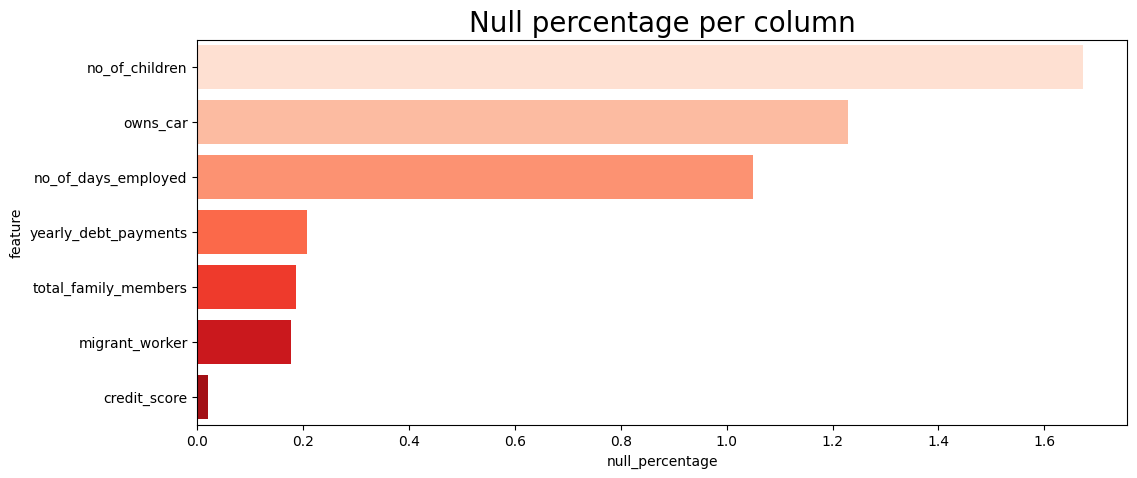

In [355]:
stat.check_null()

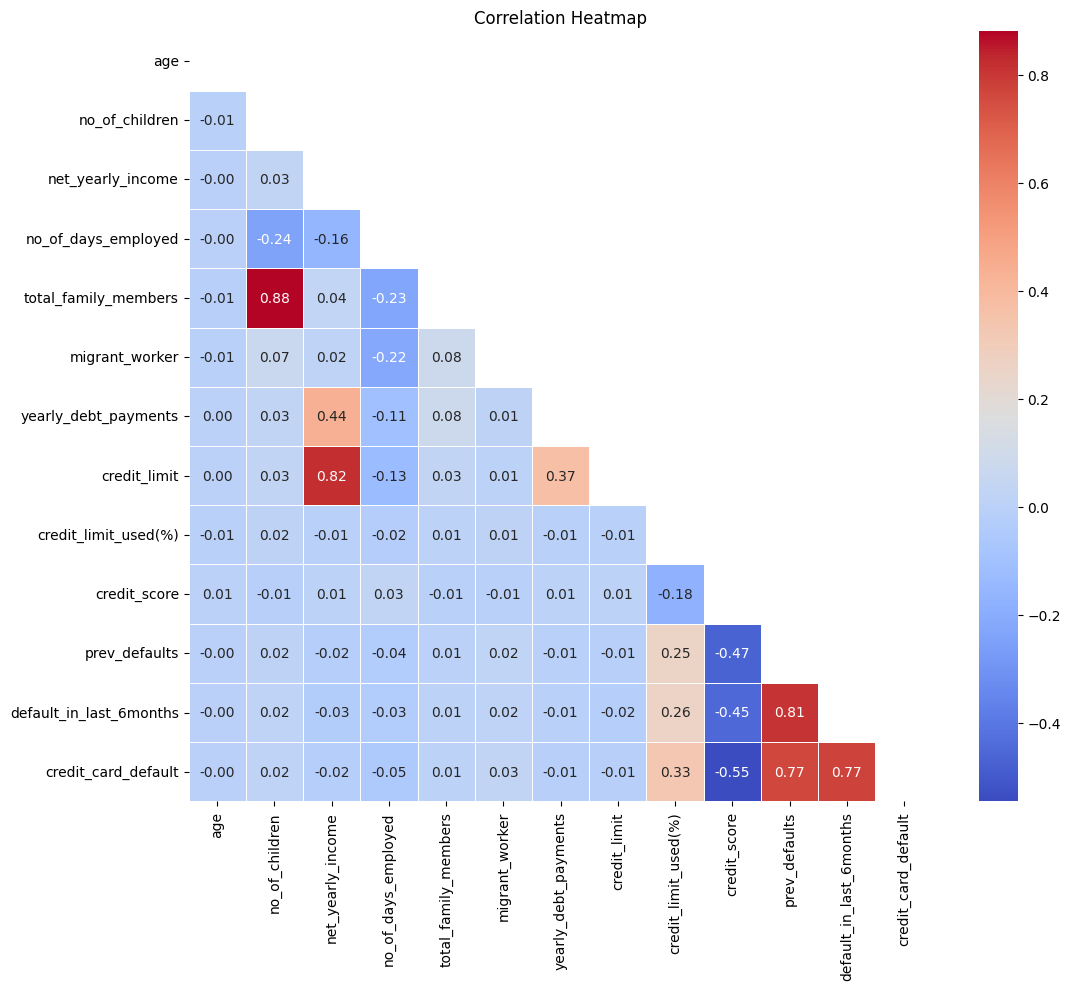

In [356]:
stat.correlation()

## Fillnan: Categorical features

In [357]:
df[cat_feats].isnull().sum()

customer_id          0
name                 0
gender               0
owns_car           369
owns_house           0
occupation_type      0
dtype: int64

In [358]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: proportion, Length: 3514, dtype: float64


Column Name: gender
gender
F      0.657700
M      0.342267
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.660862
Y    0.339138
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6962
N    0.3038
Name: 

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

### Gender

In [359]:
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [360]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

gender
F    19731
M    10269
Name: count, dtype: int64

### Owns car

In [361]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3735598712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


In [362]:
df["owns_car"].value_counts(normalize=True)

owns_car
N    0.665033
Y    0.334967
Name: proportion, dtype: float64

In [363]:
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

## Fillnan:  Numerical features

In [364]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

no_of_children          502
no_of_days_employed     315
yearly_debt_payments     62
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
net_yearly_income         0
credit_limit              0
credit_limit_used(%)      0
dtype: int64

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 30000 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

### no_of_days_employed

In [366]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [367]:
df.no_of_days_employed.isna().sum()

0

### yearly_debt_payments

In [368]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [369]:
df['yearly_debt_payments'].isna().sum()

0

In [370]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children          502
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
dtype: int64

### migrant_worker

In [371]:
df['migrant_worker'].mode()

0    0.0
Name: migrant_worker, dtype: float64

In [372]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

C:\Users\swift\AppData\Local\Temp\ipykernel_21928\341355721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)


0

### total_family_members

In [373]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

C:\Users\swift\AppData\Local\Temp\ipykernel_21928\625074398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


0

In [374]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children         502
credit_score             6
age                      0
net_yearly_income        0
no_of_days_employed      0
dtype: int64

### no_of_children

In [375]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

C:\Users\swift\AppData\Local\Temp\ipykernel_21928\1293685831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)


### credit_score

In [376]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

0

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64


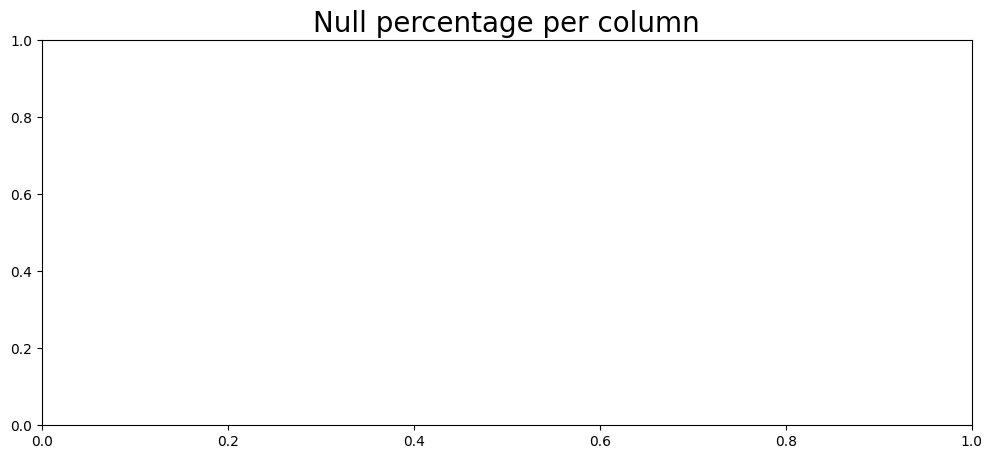

In [377]:
stat = StatisticAnalysis(df[num_feats])
stat.check_null()

In [378]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

## Concentrated EDA

In [379]:

fraud = df[df['credit_card_default']==1]
non_fraud = df[df['credit_card_default']==0]

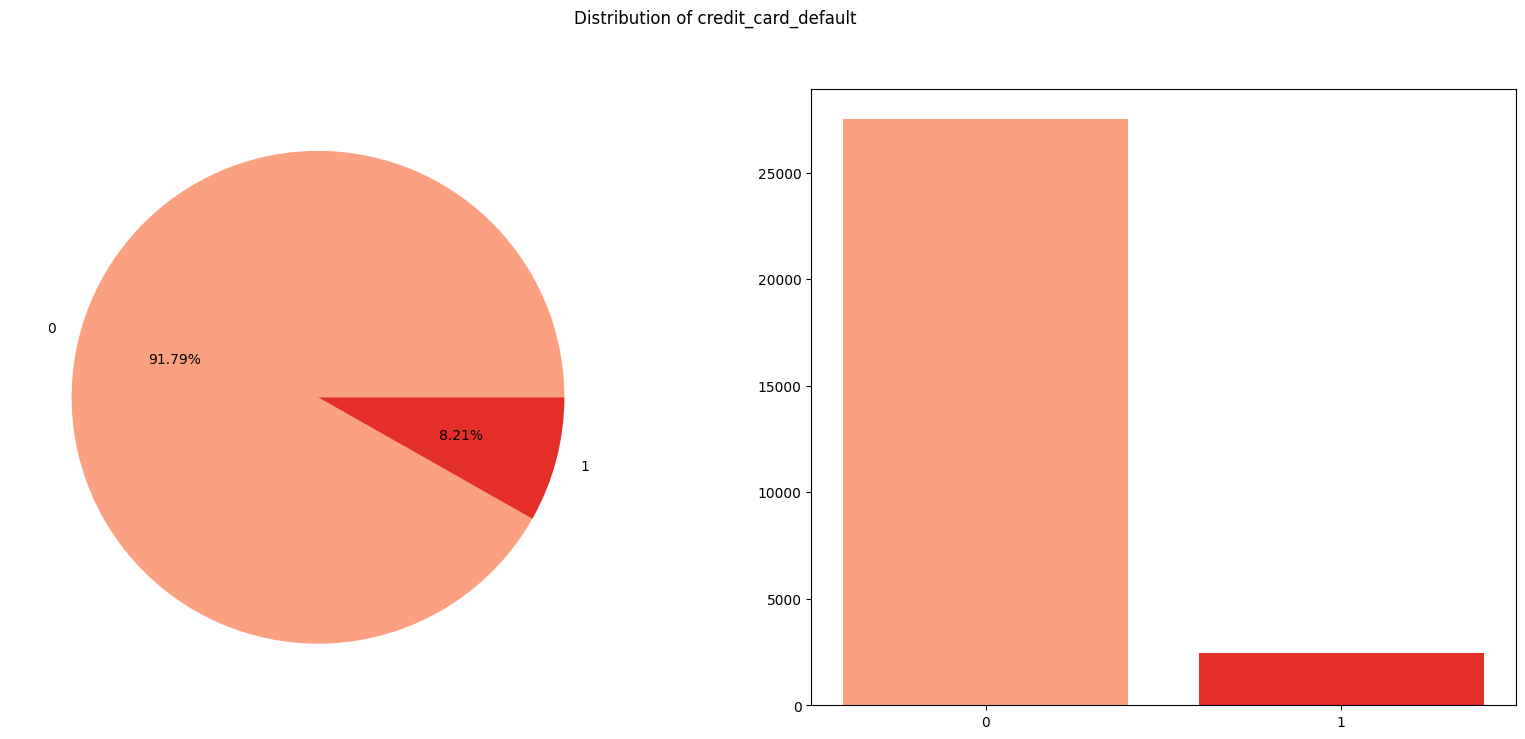

In [380]:
univariate_train.visualize(x='credit_card_default')

***Nhận xét chung***
- Tỷ lệ những người trả được nợ chỉ chiếm một phần nhỏ trong dataset (8.21%). Ta thấy rằng tập dữ liệu có sự mất cân bằng rất cao (highly imbalance)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 30000 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           30000 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      30000 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     30000 non-null  float64
 11  migrant_worker           30000 non-null  float64
 12  yearly_debt_payments     30000 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

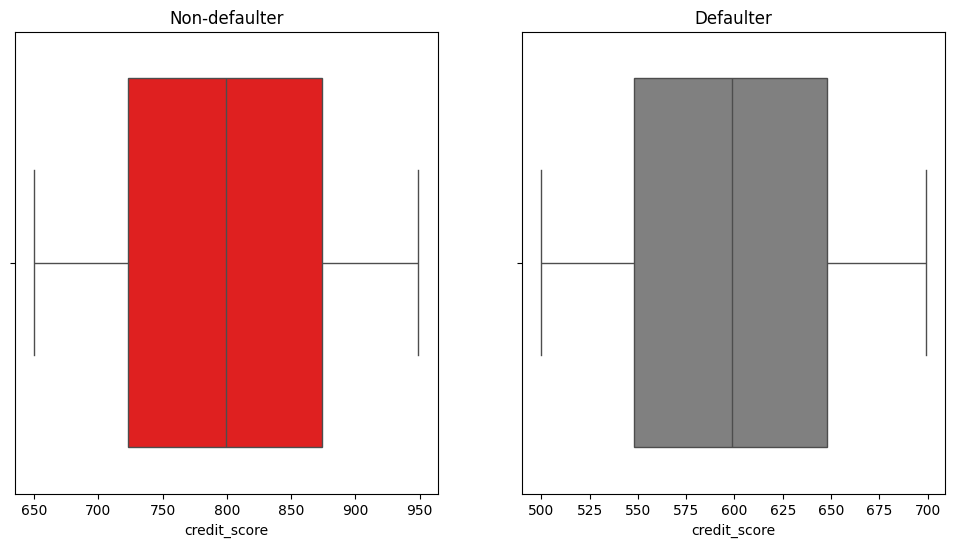

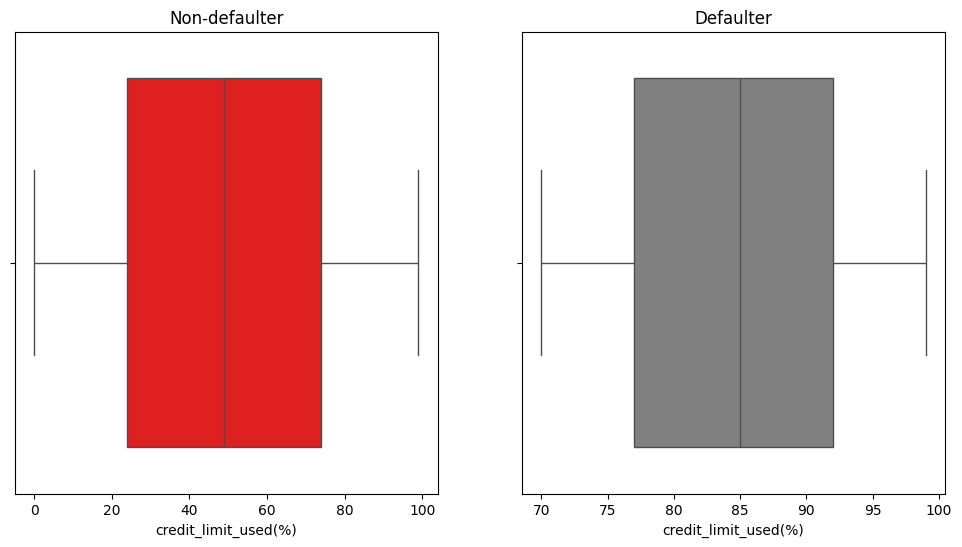

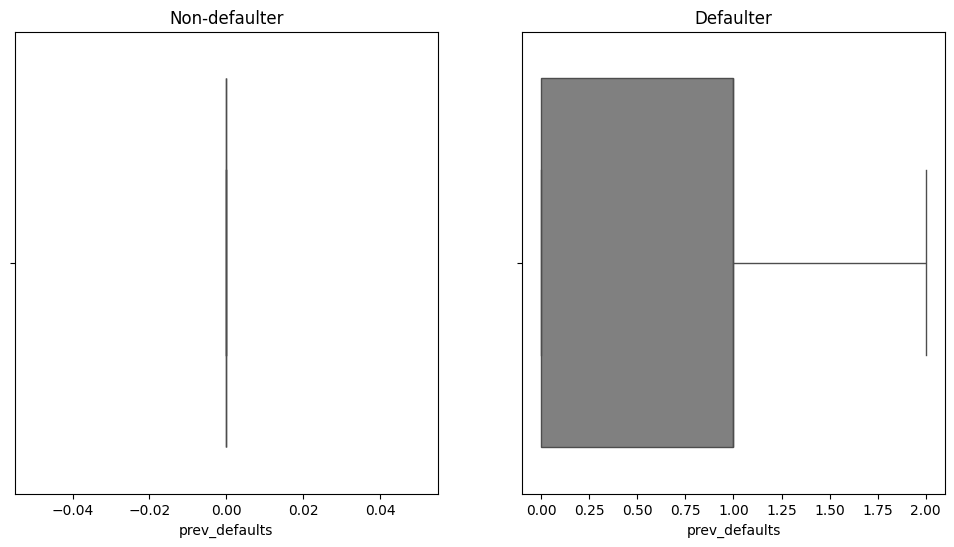

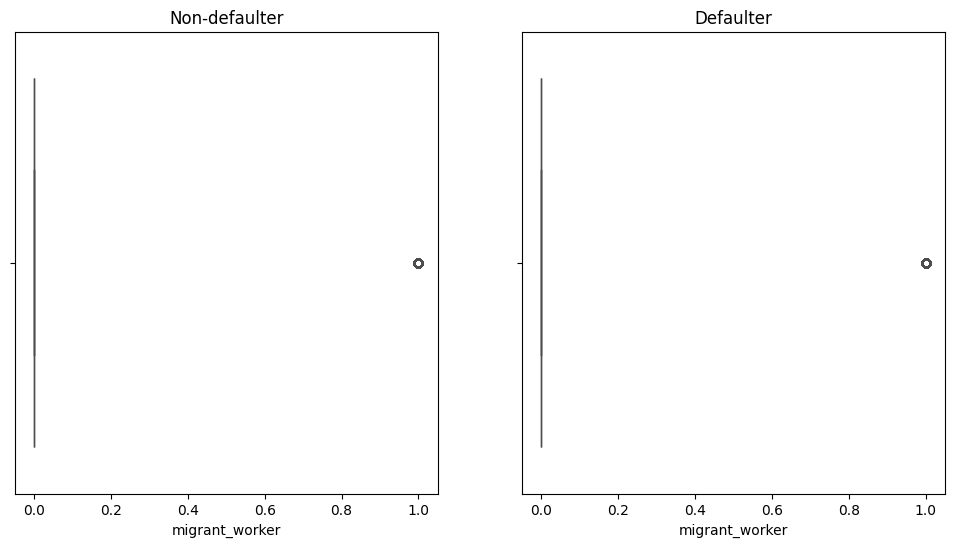

In [382]:
bivariate_train.box_plot2(x= 'credit_score', df1= non_fraud, df2 = fraud)
bivariate_train.box_plot2(x= 'credit_limit_used(%)', df1= non_fraud, df2 = fraud)
bivariate_train.box_plot2(x= 'prev_defaults', df1= non_fraud, df2 = fraud)
bivariate_train.box_plot2(x= 'migrant_worker', df1= non_fraud, df2 = fraud)

C:\Users\swift\AppData\Local\Temp\ipykernel_21928\265951273.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


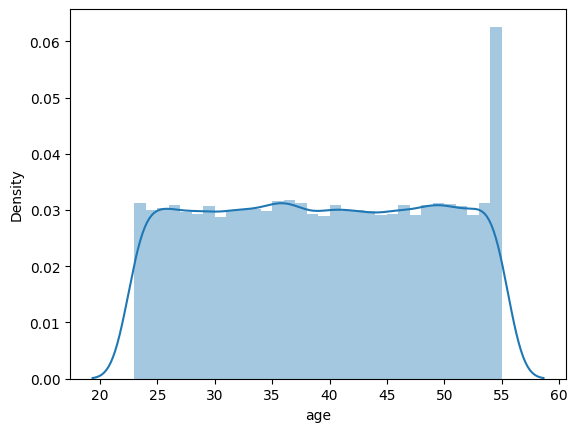

In [383]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

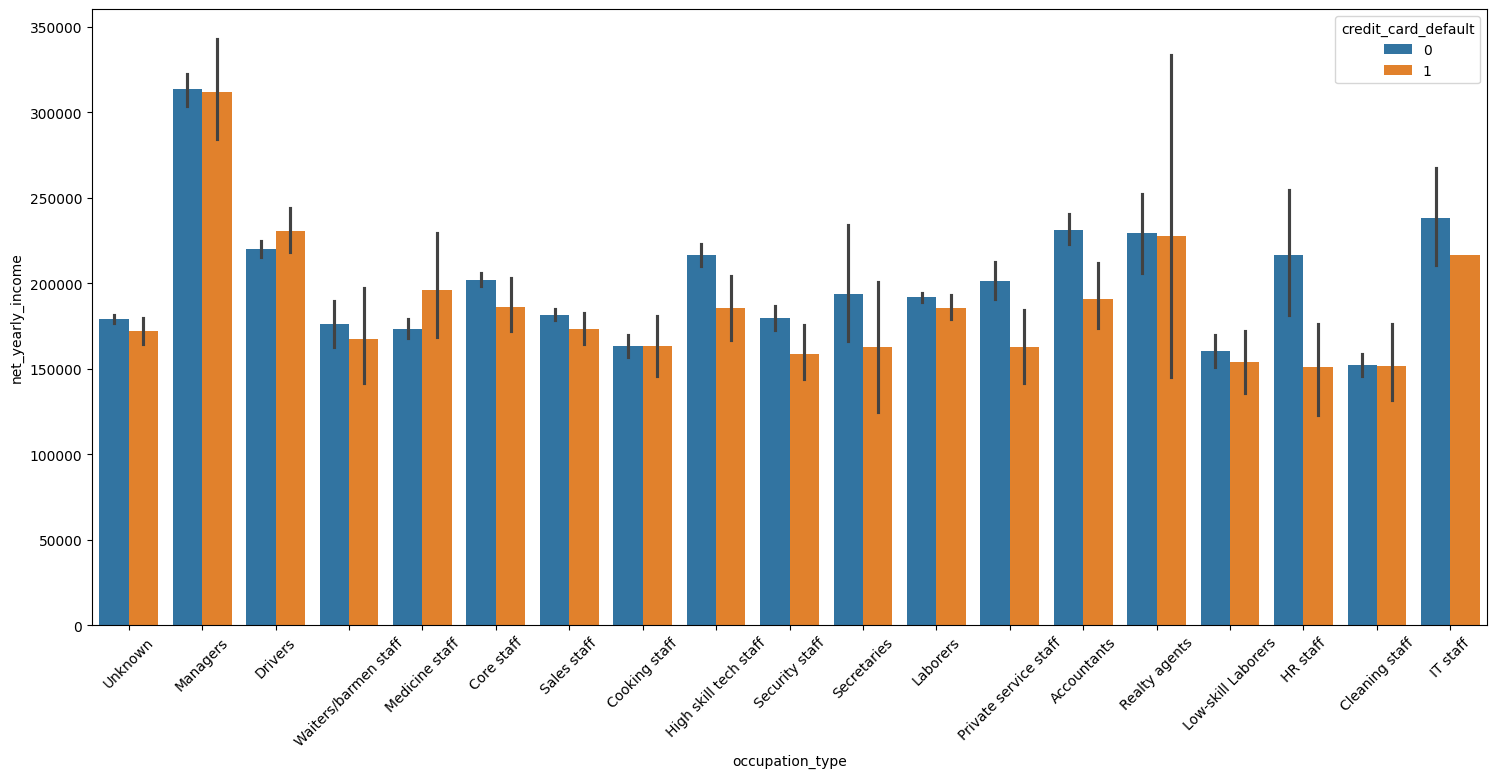

In [384]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

In [385]:
# # male or female defaulters
# plt.figure(figsize=[7,6])
# sns.countplot(df['gender'], hue=df['credit_card_default'])
# plt.show()

count    3.000000e+04
mean     1.974790e+05
std      1.169316e+05
min      2.853217e+04
25%      1.258860e+05
50%      1.715995e+05
75%      2.409960e+05
max      4.433825e+06
Name: net_yearly_income, dtype: float64


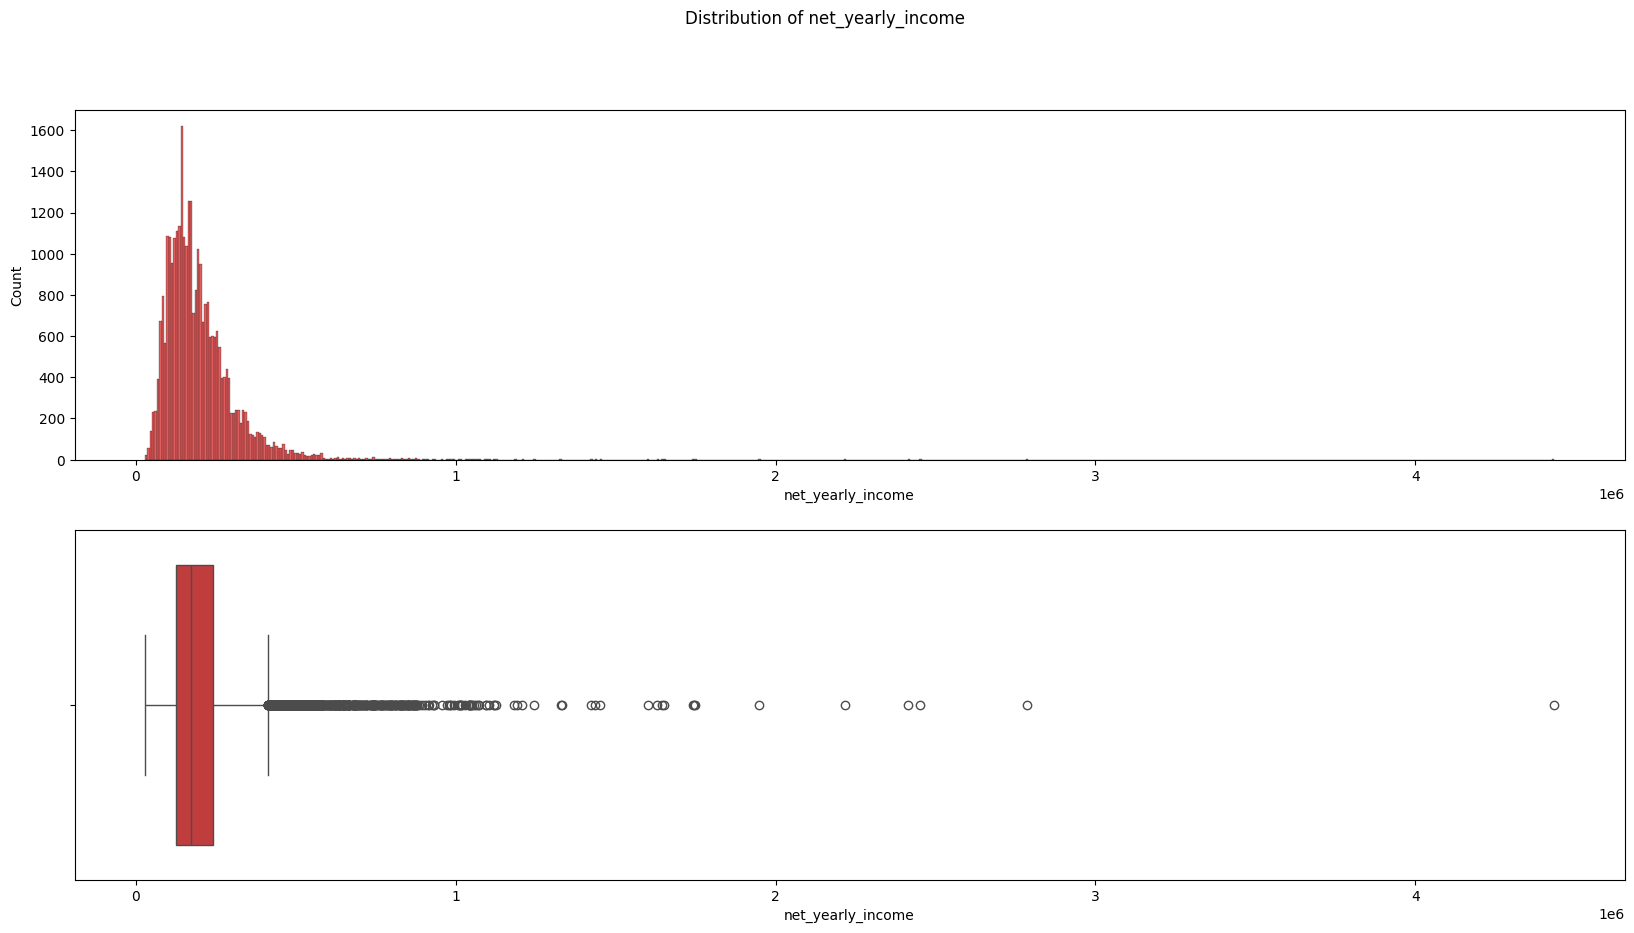

count     30000.000000
mean      31696.689595
std       17187.043420
min        2881.980000
25%       19119.722500
50%       28970.630000
75%       40468.555000
max      328112.860000
Name: yearly_debt_payments, dtype: float64


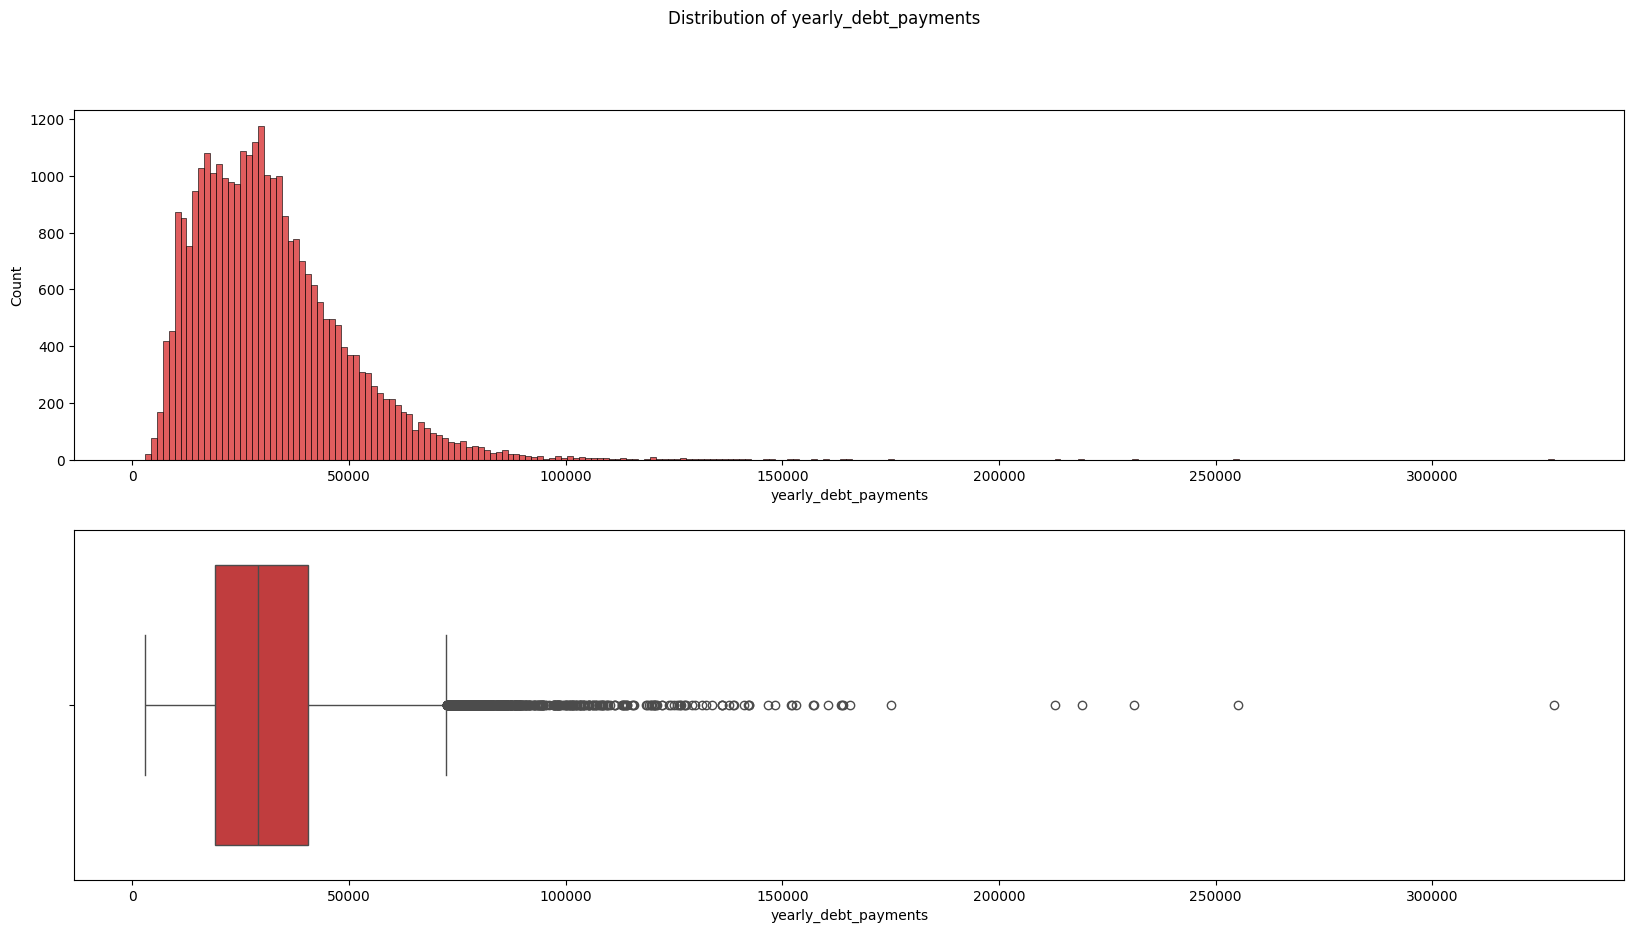

count    30000.000000
mean        52.252133
std         29.396822
min          0.000000
25%         27.000000
50%         54.000000
75%         78.000000
max         99.000000
Name: credit_limit_used(%), dtype: float64


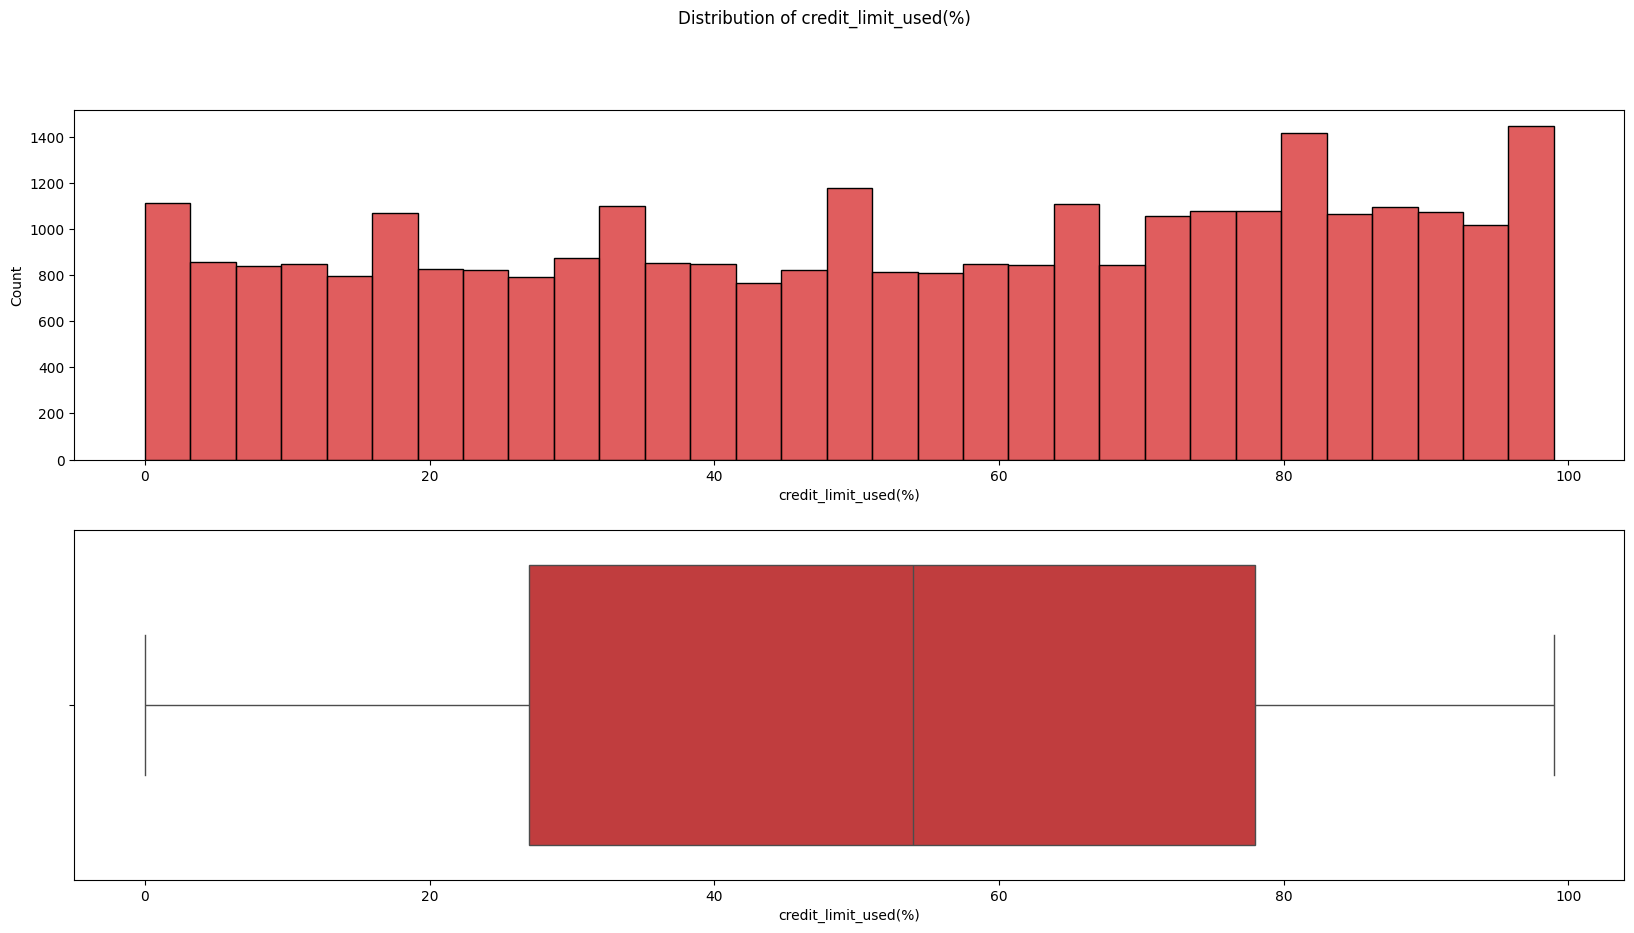

count    30000.000000
mean       782.315683
std        100.931800
min        500.000000
25%        703.000000
50%        786.000000
75%        867.000000
max        949.000000
Name: credit_score, dtype: float64


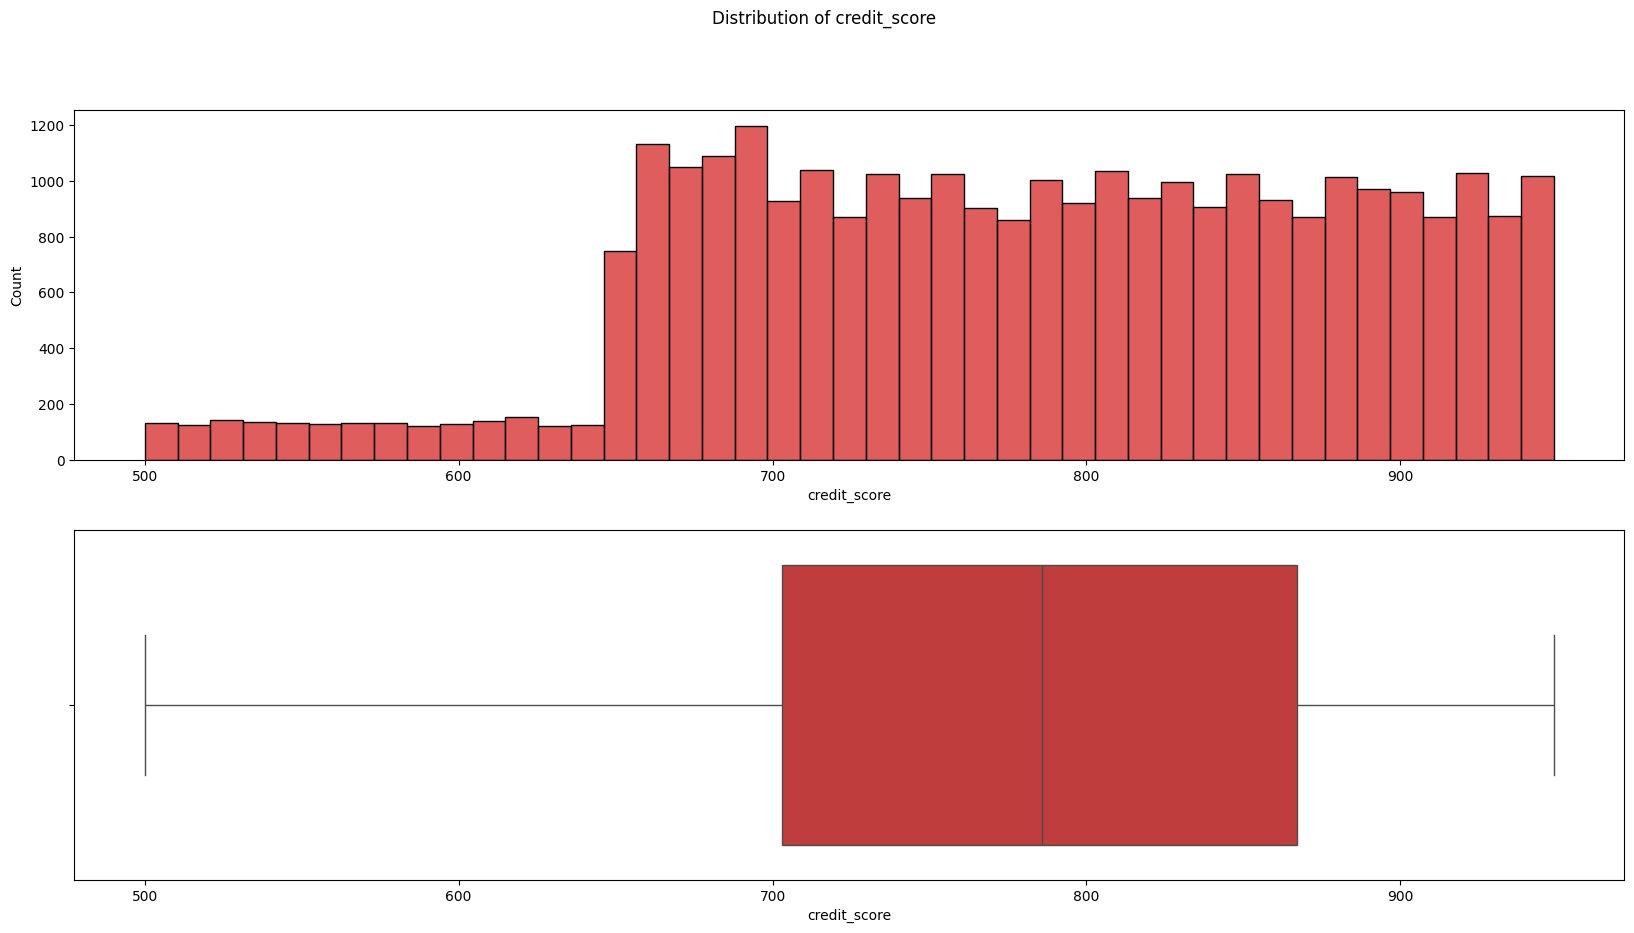

In [386]:
# boxplot of all continuous variables


univariate_train.visualize_numeric(x='net_yearly_income')
univariate_train.visualize_numeric(x='yearly_debt_payments')
univariate_train.visualize_numeric(x='credit_limit_used(%)')
univariate_train.visualize_numeric(x='credit_score')


# Data Processing

Binning và Tính IV

In [387]:
import numpy as np
import matplotlib.pyplot as plt

MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 10, qcut = None):
  X = data[[colname, 'credit_card_default']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
        # Thay thế threshold đầu và cuối của thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X, 
                index = ['bins'],
                values = ['credit_card_default'],
                columns = ['credit_card_default'],
                aggfunc = {
                    'credit_card_default':np.size
                })

  df_Count = pd.pivot_table(X, 
                index = ['bins'],
                values = ['credit_card_default'],
                aggfunc = {
                    'credit_card_default': np.size
                })
  
  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#BAD', '#GOOD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres

In [388]:
df_summary, thres = _bin_table(df, 'no_of_days_employed', n_bins=4)
df_summary

C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,


,Thres,No_Obs,#BAD,#GOOD
bins,,,,
"(-999999999.0, 938.0]",938.0,7507,6642,865
"(938.0, 2197.0]",2197.0,7496,6774,722
"(2197.0, 5758.0]",5758.0,7498,6988,510
"(5758.0, 999999999.0]",999999999.0,7499,7133,366


In [389]:
def _WOE(data, colname, n_bins= None, min_obs = 100, qcut = None):
  # Thống kê bins và lấy ra thres hold ban đầu
  df_summary, thres = _bin_table(data, colname, n_bins = n_bins, qcut = qcut)
  # Thay thế giá trị 0 của #BAD trong df_summary bằng 1 để không bị lỗi chia cho 0
  df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})
  
  if qcut is not None:
    # Lọc bỏ threshold để tạo thành threshold mới mà thỏa mãn số lượng quan sát >= min_obs
    exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
    if exclude_ind.shape[0] > 0:
      new_thres = np.delete(thres, exclude_ind)
      print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
      # Tính toán lại bảng summary
      df_summary, thres = _bin_table(data, colname, qcut=new_thres)
  
  new_thres = thres
  df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
  df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
  df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
  df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
  df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
  df_summary['COLUMN'] = colname
  IV = df_summary['IV'].sum()
  print('Information Value of {} column: {}'.format(colname, IV))
  return df_summary, IV, new_thres


In [390]:

df_summary, IV, thres = _WOE(df, 'no_of_days_employed', n_bins=4)
df_summary

Information Value of no_of_days_employed column: 0.12045919137180702


C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 938.0]",938.0,7507,6642,865,0.130232,0.241203,0.351198,0.375712,0.041326,no_of_days_employed
"(938.0, 2197.0]",2197.0,7496,6774,722,0.106584,0.245996,0.293138,0.175329,0.008265,no_of_days_employed
"(2197.0, 5758.0]",5758.0,7498,6988,510,0.072982,0.253768,0.207065,-0.203389,0.009499,no_of_days_employed
"(5758.0, 999999999.0]",999999999.0,7499,7133,366,0.051311,0.259033,0.148599,-0.555703,0.061369,no_of_days_employed


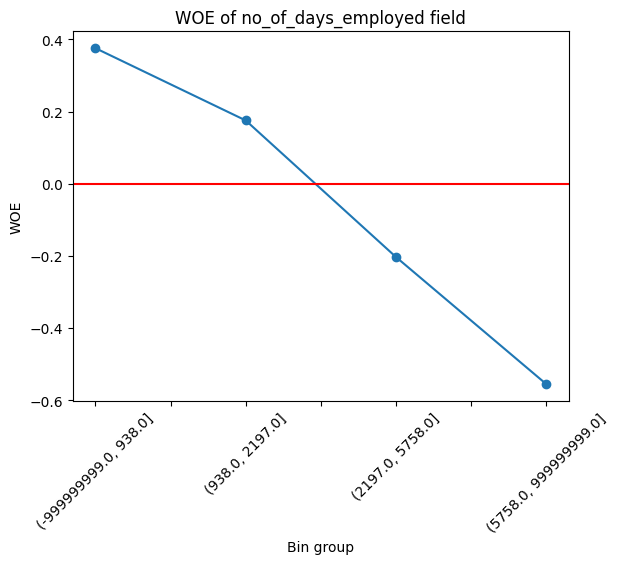

In [391]:
def _plot(df_summary):
    colname = list(df_summary['COLUMN'].unique())[0]
    df_summary['WOE'].plot(linestyle='-', marker='o')
    plt.title('WOE of {} field'.format(colname))
    plt.axhline(y=0, color = 'red')
    plt.xticks(rotation=45)
    plt.ylabel('WOE')
    plt.xlabel('Bin group')

_plot(df_summary)

In [392]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0


In [393]:

nbins = {
    # 'age':2,
    # 'no_of_children': 2,
    'net_yearly_income': 5,
    'no_of_days_employed': 10,
    # 'total_family_members': 5,
    # 'migrant_worker': 5,
    'yearly_debt_payments': 5,
    'credit_limit': 5,
    # 'credit_limit_used(%)': 3,
    'credit_score': 5,
    # 'prev_defaults': 2,
    # 'default_in_last_6months': 2
}
df_for_woe = df.copy()
WOE_dict=dict()
for (col, bins) in nbins.items():
    df_for_woe_summary, IV, thres = _WOE(df_for_woe, colname=col, n_bins=bins)
    WOE_dict[col] = {'table':df_for_woe_summary, 'IV':IV}

C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_Count = pd.pivot_table(X,
C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_GB = pd.pivot_table(X,
C:\Users\swift\AppData\Local\Temp\ipykernel_21928\3777326024.py:37: FutureWarning: Th

Information Value of net_yearly_income column: 0.013037941800487424
Information Value of no_of_days_employed column: 0.13324728532482916
Information Value of yearly_debt_payments column: 0.028216203863931994
Information Value of credit_limit column: 0.007721226951902626
Information Value of credit_score column: 1.8213894959174368


In [394]:
df_for_woe.age = df_for_woe.age.astype('object')
df_for_woe.total_family_members = df_for_woe.total_family_members.astype('object')
df_for_woe.migrant_worker = df_for_woe.migrant_worker.astype('object')
df_for_woe['credit_limit_used(%)']	 = df_for_woe['credit_limit_used(%)'].astype('object')
df_for_woe['default_in_last_6months'] = df_for_woe['default_in_last_6months'].astype('object')
df_for_woe['prev_defaults'] = df_for_woe['prev_defaults'].astype('object')
df_for_woe.no_of_children = df_for_woe.no_of_children.astype('object')


In [395]:
for col in ['owns_car','gender','occupation_type','owns_house', 'age','total_family_members','migrant_worker','credit_limit_used(%)','no_of_children', 'prev_defaults', 'default_in_last_6months']:
    df_summary, IV, thres = _WOE(df_for_woe, colname=col)
    WOE_dict[col] = {'table':df_for_woe_summary, 'IV':IV}

Information Value of owns_car column: 0.004524445613846694
Information Value of gender column: 0.04850281011176208
Information Value of occupation_type column: 0.09631979344946327
Information Value of owns_house column: 7.046135630204507e-05
Information Value of age column: 0.015056763188509903
Information Value of total_family_members column: 0.0068162938589453916
Information Value of migrant_worker column: 0.012560939515818404
Information Value of credit_limit_used(%) column: 0.8650800985456413
Information Value of no_of_children column: 0.00831798871768539
Information Value of prev_defaults column: 0.7027748319509229
Information Value of default_in_last_6months column: 0.6008947590641771


In [396]:
columns = []
IVs = []
for col in df_for_woe.drop(['credit_card_default', 'customer_id', 'name'], axis=1).columns:
    if col != 'credit_card_default':
        columns.append(col)
        IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def _rank_IV(iv):
      if iv <= 0.02:
        return 'Useless'
      elif iv <= 0.1:
        return 'Weak'
      elif iv <= 0.3:
        return 'Medium'
      elif iv <= 0.5:
        return 'Strong'
      else:
        return 'suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV', ascending=False)

,column,IV,rank
13,credit_score,1.821389,suspicious
12,credit_limit_used(%),0.865080,suspicious
14,prev_defaults,0.702775,suspicious
15,default_in_last_6months,0.600895,suspicious
6,no_of_days_employed,0.133247,Medium
7,occupation_type,0.096320,Weak
1,gender,0.048503,Weak
10,yearly_debt_payments,0.028216,Weak
0,age,0.015057,Useless
5,net_yearly_income,0.013038,Useless


## Encoding

In [397]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0)
df["owns_car"] = df["owns_car"].apply(lambda x : 1 if x == "Y" else 0)
df["owns_house"] = df["owns_house"].apply(lambda x : 1 if x == "Y" else 0)

In [398]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation")
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,CST_163708,Wachtel,50,1,0,1,0.0,269502.14,4181.0,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44609,CST_131305,Deepa,29,1,0,1,0.0,115795.25,365250.0,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44264,CST_131350,Jason,39,1,0,1,0.0,113477.67,365241.0,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
33556,CST_106655,Gilbert Kreijger,35,1,1,1,1.0,215555.19,1882.0,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
28050,CST_154013,Slater,53,0,1,1,0.0,185082.22,365244.0,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Split dataset

In [399]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

df.drop(['customer_id', 'name'], axis=1, inplace=True)
# df.drop(low_IV_cols, axis=1, inplace=True)
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,50,1,0,1,0.0,269502.14,4181.0,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44609,29,1,0,1,0.0,115795.25,365250.0,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44264,39,1,0,1,0.0,113477.67,365241.0,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
33556,35,1,1,1,1.0,215555.19,1882.0,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
28050,53,0,1,1,0.0,185082.22,365244.0,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [400]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 34) (9000, 34)
y= (21000,) (9000,)


In [401]:
X_train.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,36,1,0,1,0.0,226719.63,365246.0,2.0,0.0,13173.65,53074.15,96,922.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5389,55,1,0,1,1.0,42982.56,1206.0,3.0,1.0,21116.13,7196.97,16,711.0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8704,23,1,0,1,1.0,147039.34,4040.0,3.0,0.0,13236.97,34109.25,18,761.0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37747,42,0,1,1,0.0,224769.69,96.0,1.0,0.0,53655.26,33734.88,51,854.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
27346,37,0,0,0,0.0,189352.68,5326.0,2.0,0.0,32107.58,50858.84,92,700.0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [402]:
y_train

26658    0
5389     0
8704     0
37747    0
27346    0
        ..
34093    0
823      0
32715    0
14006    0
21152    0
Name: credit_card_default, Length: 21000, dtype: int64

##  Kiểm tra mô hình trên tập train cho mô hình logistic với dữ liệu ban đầu

In [403]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

Data Imbalancing Handling

In [404]:
# initialize SMOTE method
sm = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5, n_jobs=-1)
X_train,y_train = sm.fit_resample(X_train,y_train)

c:\Users\swift\anaconda\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [405]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 34)
Dimension of y_train_sm Shape: (38552,)


In [406]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 34)
y_train.shape: (38552,)


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,0.40625,1.0,0.0,1.0,0.000000,0.081782,0.999984,0.111111,0.0,0.040803,0.058555,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.00000,1.0,0.0,1.0,0.111111,0.005963,0.003296,0.222222,1.0,0.072293,0.003780,0.161616,0.469933,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,1.0,0.0,1.0,0.111111,0.048902,0.011055,0.222222,0.0,0.041054,0.035912,0.181818,0.581292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.59375,0.0,1.0,1.0,0.000000,0.080977,0.000257,0.000000,0.0,0.201300,0.035465,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.43750,0.0,0.0,0.0,0.000000,0.066362,0.014576,0.111111,0.0,0.115870,0.055910,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [407]:
y_train.value_counts(normalize=True)

credit_card_default
0    0.5
1    0.5
Name: proportion, dtype: float64

Chạy mô hình Logistic cho tập train cho dữ liệu ban đầu

In [408]:
results = []
def evaluation(model, model_name, X_train,X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)
    
    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)
    
    #plot roc curve
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', label='ROC Curve')

    # Fill below the ROC curve with color
    plt.fill_between(fpr, 0, tpr, color='skyblue', alpha=0.2)

    # Plot the diagonal line (y=x) for reference
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')

    # Add labels and title
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')

    # Show the plot
    plt.show()
    results.append({"Model": model_name,"Accuracy": 100*accuracy_score(y_test, y_test_pred), "F1 Score": 100*f1_score(y_test, y_test_pred, average="macro"), "AUC": roc_auc})

c:\Users\swift\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\swift\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

(38552, 17)
[[7805  456]
 [  16  723]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.98      0.75       739

    accuracy                           0.95      9000
   macro avg       0.81      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy of TEST data: 94.75555555555556
F1_Score of TEST data: 86.22803699341189
RMSE:  0.22900752049756892
ROC AUC score:  0.9615749959991016


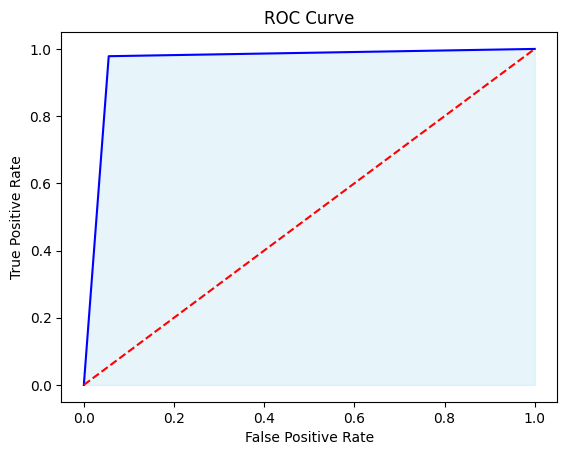

In [409]:
lr = LogisticRegression()
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(lr,
                                direction= 'backward')
selector = sfs.fit(X_train, y_train)
# predicted proability
X_train = X_train.iloc[:,lambda X_train: selector.get_support()]
X_test = X_test.iloc[:,lambda X_test: selector.get_support()]
print(X_train.shape)
lr.fit(X_train, y_train)
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]
evaluation(lr, "Logistic Regression Baseline",  X_train,X_test, y_test)



## Chạy mô hình logit cho tập train cho dữ liệu sử dụng WOE

[INFO] creating woe binning ...


c:\Users\swift\anaconda\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\swift\anaconda\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\swift\anaconda\lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

Binning on 30000 rows and 35 columns in 00:00:20


c:\Users\swift\anaconda\lib\site-packages\scorecardpy\woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


{'occupation_Realty agents': <Figure size 640x480 with 2 Axes>,
 'occupation_High skill tech staff': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'occupation_Drivers': <Figure size 640x480 with 2 Axes>,
 'occupation_Laborers': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>,
 'occupation_Core staff': <Figure size 640x480 with 2 Axes>,
 'occupation_Sales staff': <Figure size 640x480 with 2 Axes>,
 'occupation_Low-skill Laborers': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'owns_house': <Figure size 640x480 with 2 Axes>,
 'occupation_Cooking staff': <Figure size 640x480 with 2 Axes>,
 'occupation_Secretaries': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'occupation_Unknown': <Figure size 640x480 with 2 Axes>,

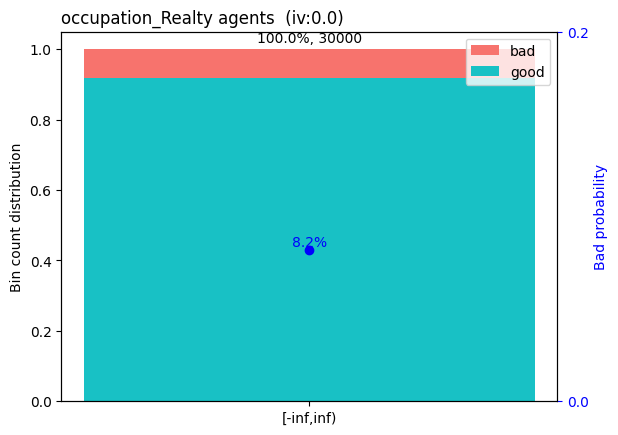

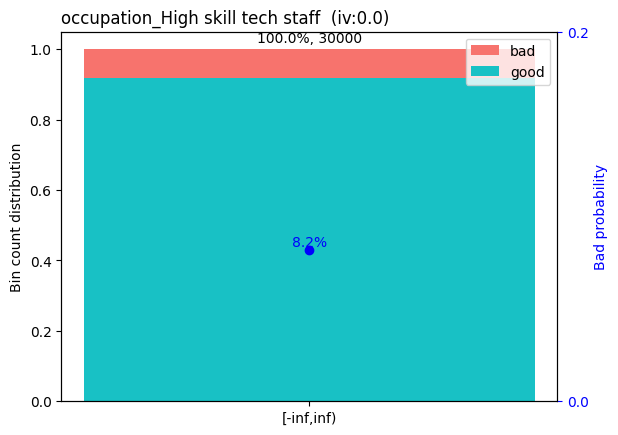

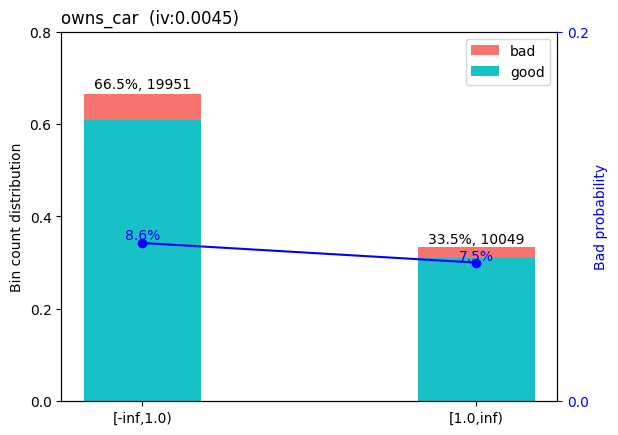

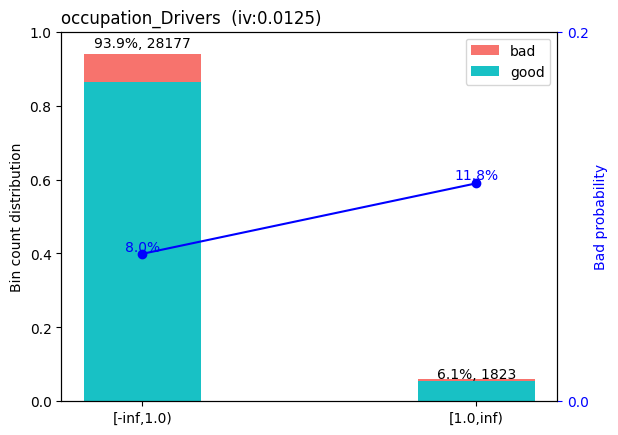

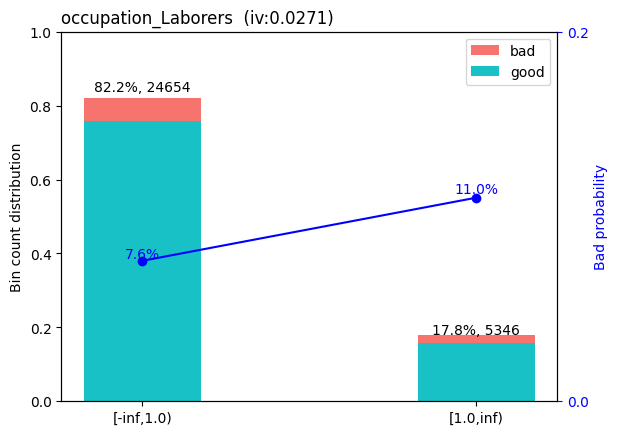

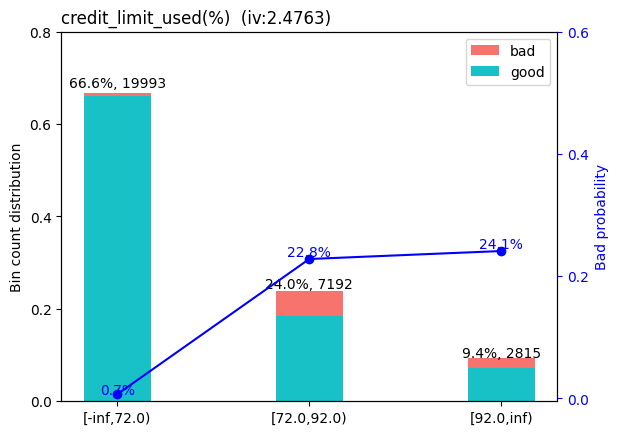

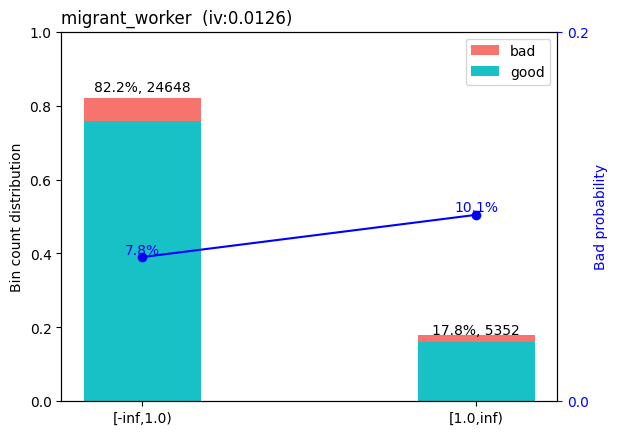

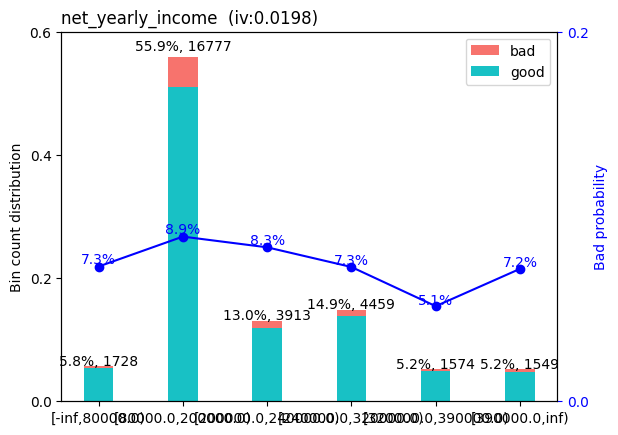

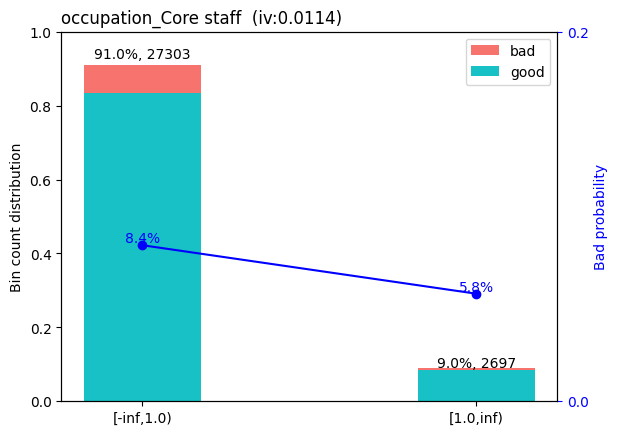

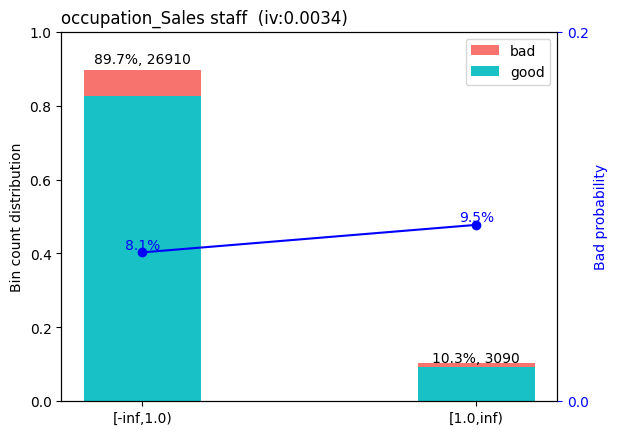

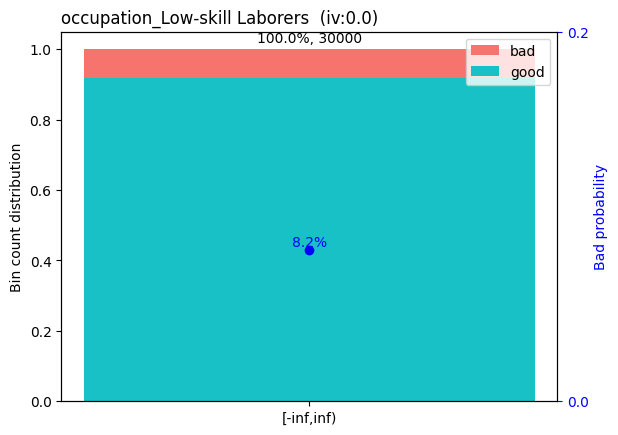

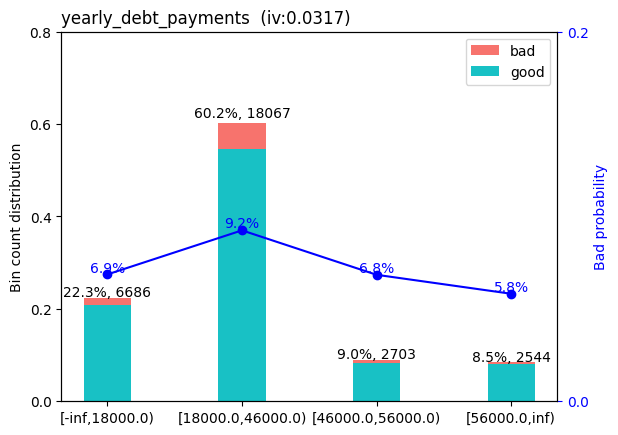

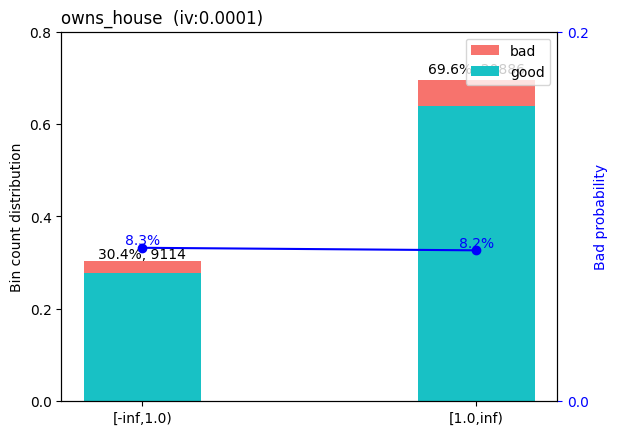

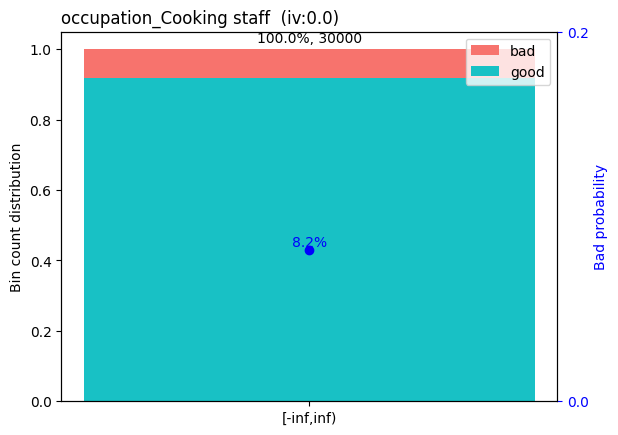

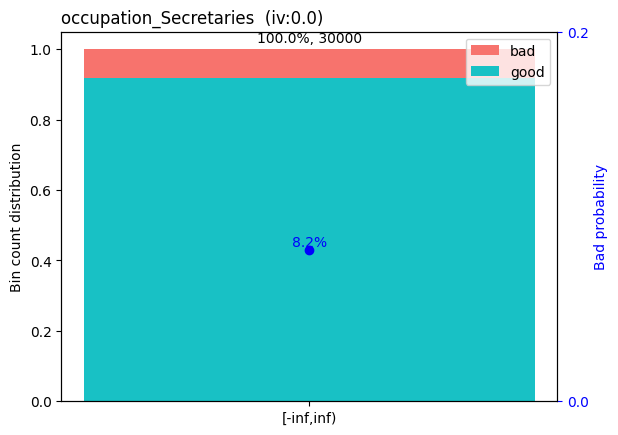

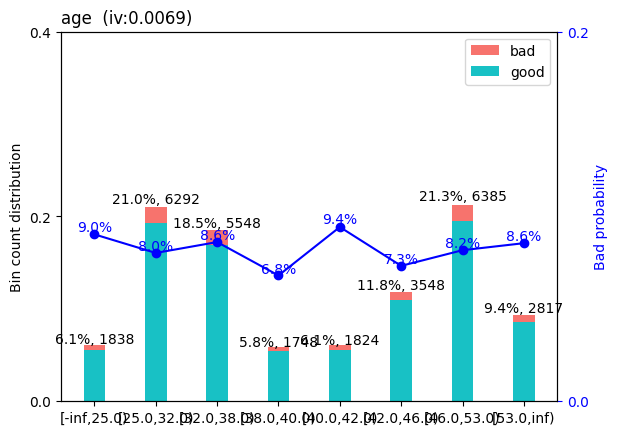

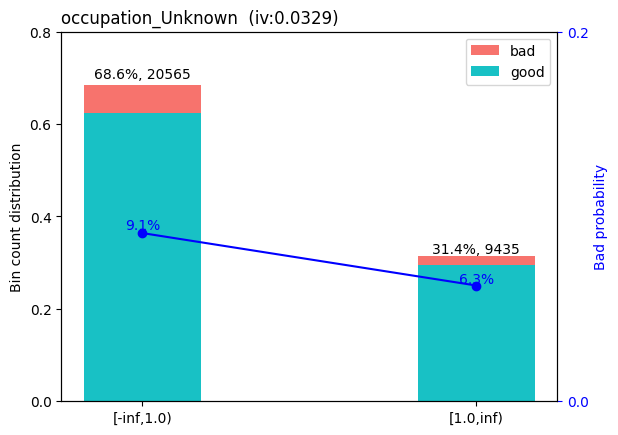

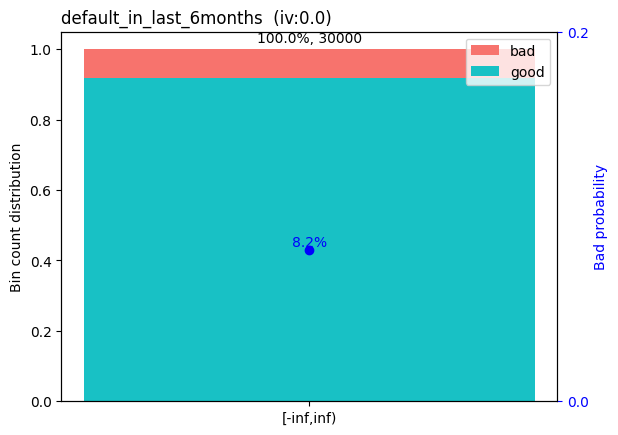

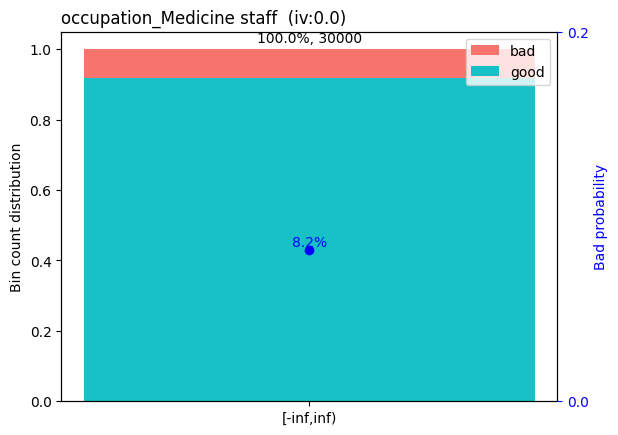

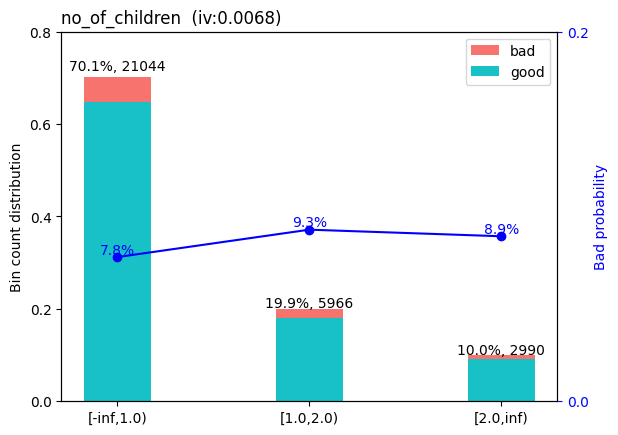

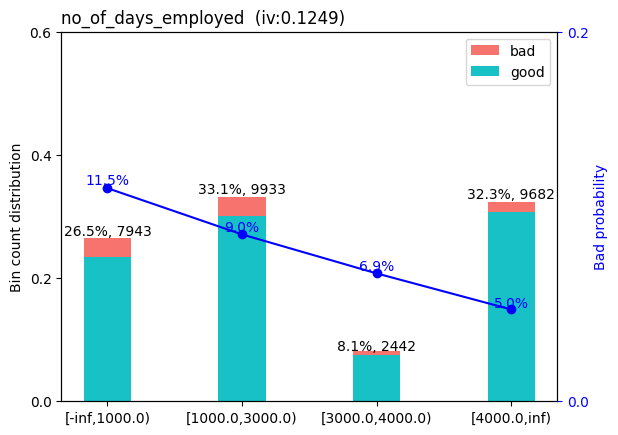

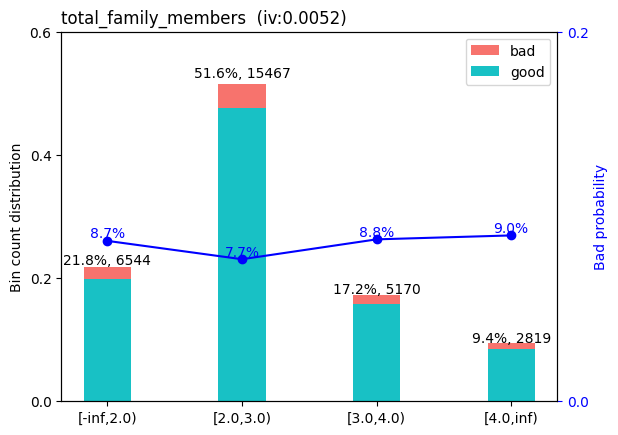

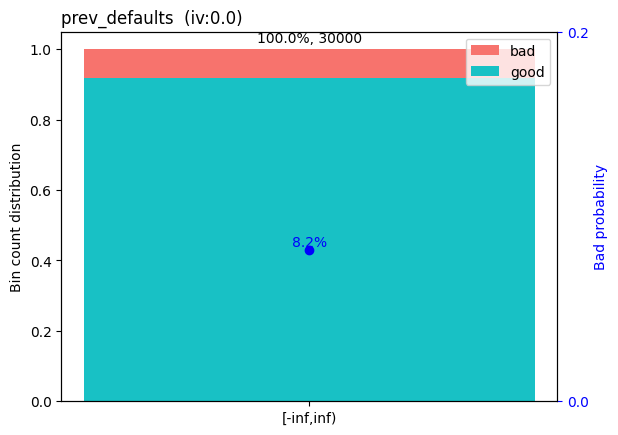

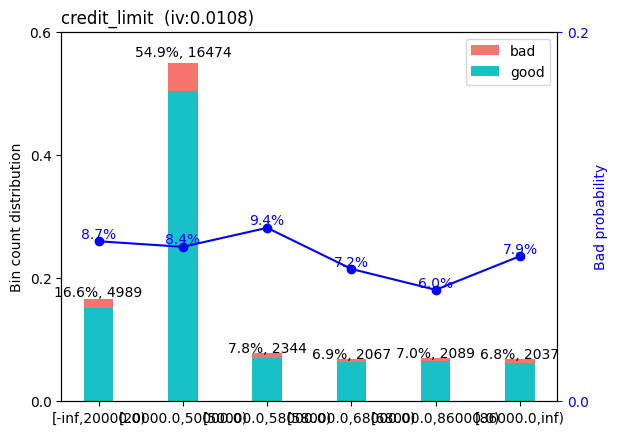

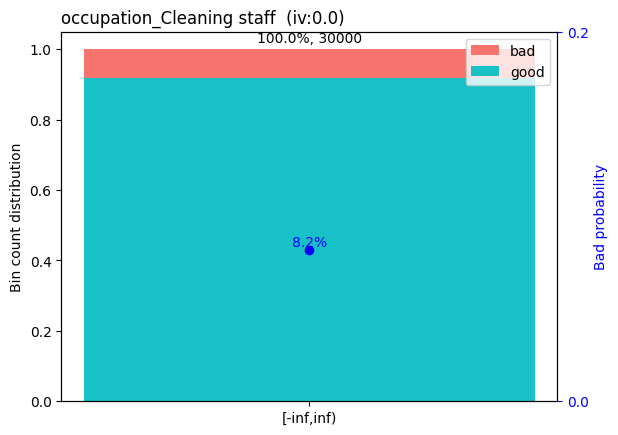

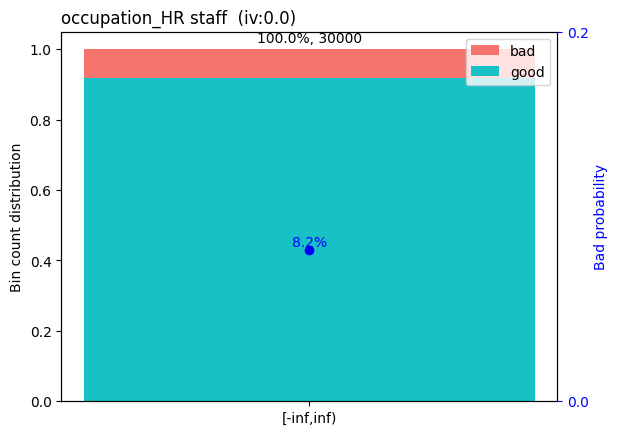

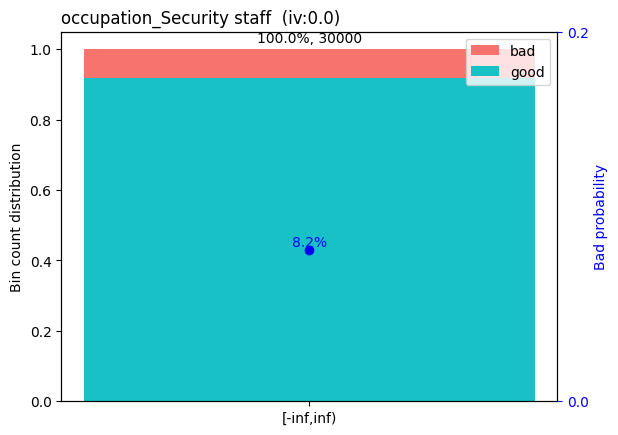

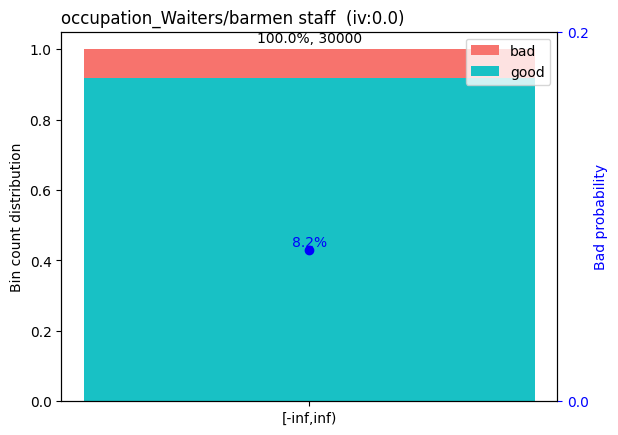

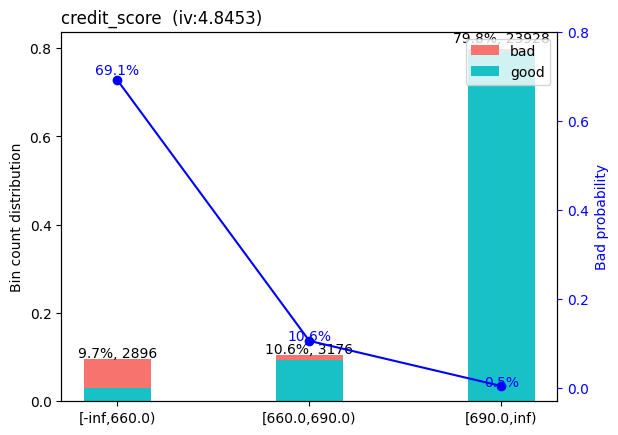

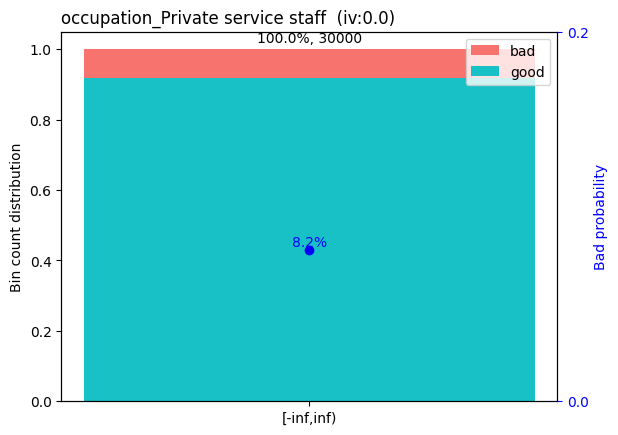

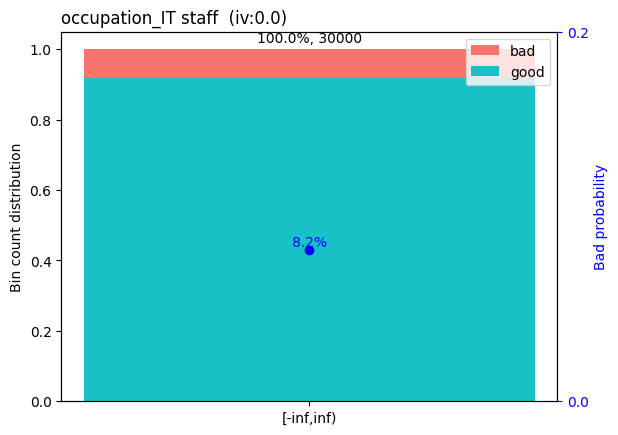

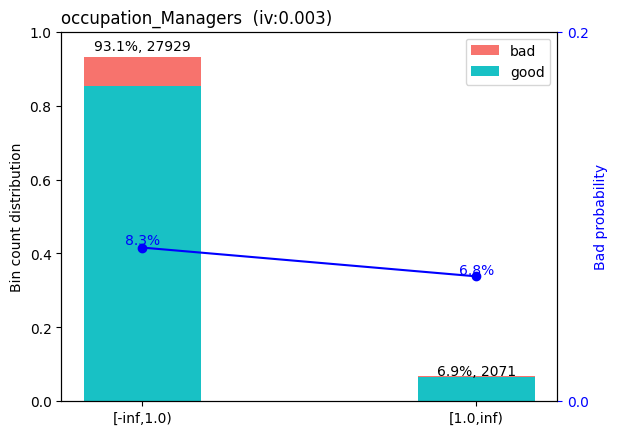

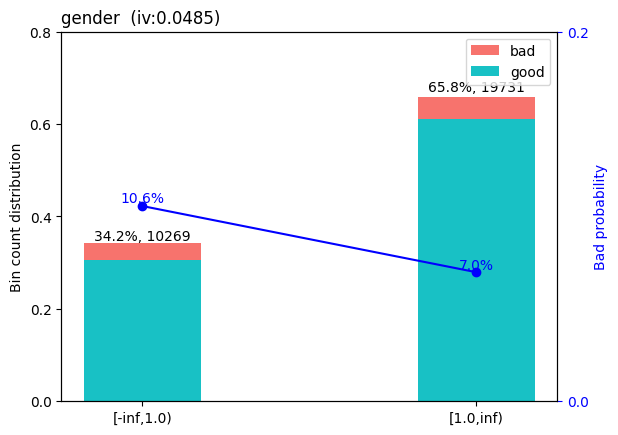

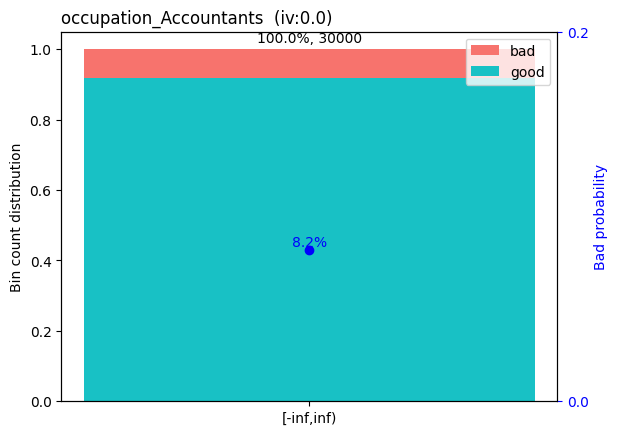

In [410]:
# woe binning ------
bins = sc.woebin(df, y="credit_card_default")
sc.woebin_plot(bins)

In [411]:
# converting train and test into woe values
train_woe = sc.woebin_ply(df, bins)
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,occupation_Realty agents_woe,occupation_High skill tech staff_woe,owns_car_woe,occupation_Drivers_woe,occupation_Laborers_woe,credit_limit_used(%)_woe,migrant_worker_woe,net_yearly_income_woe,occupation_Core staff_woe,occupation_Sales staff_woe,occupation_Low-skill Laborers_woe,yearly_debt_payments_woe,owns_house_woe,occupation_Cooking staff_woe,occupation_Secretaries_woe,age_woe,occupation_Unknown_woe,default_in_last_6months_woe,occupation_Medicine staff_woe,no_of_children_woe,no_of_days_employed_woe,total_family_members_woe,prev_defaults_woe,credit_limit_woe,occupation_Cleaning staff_woe,occupation_HR staff_woe,occupation_Security staff_woe,occupation_Waiters/barmen staff_woe,credit_score_woe,occupation_Private service staff_woe,occupation_IT staff_woe,occupation_Managers_woe,gender_woe,occupation_Accountants_woe
34126,0,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,-0.132349,0.030909,-0.020547,0.0,-0.193449,-0.005566,0.0,0.0,-0.004599,-0.291528,0.0,0.0,-0.055311,-0.537050,0.060765,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
44609,0,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,-0.024660,-0.291528,0.0,0.0,-0.055311,-0.537050,-0.071457,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
44264,1,0.0,0.0,0.046332,-0.031171,-0.083657,1.195478,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,-0.202448,-0.291528,0.0,0.0,-0.055311,-0.537050,-0.071457,0.0,0.019562,0.0,0.0,0.0,0.0,0.286341,0.0,0.0,0.014183,-0.175009,0.0
33556,0,0.0,0.0,-0.097689,-0.031171,-0.083657,-2.518964,-0.055429,0.015976,0.030909,-0.020547,0.0,-0.196714,-0.005566,0.0,0.0,0.052665,0.113009,0.0,0.0,0.134941,0.104234,0.071114,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,-0.210000,-0.175009,0.0
28050,0,0.0,0.0,-0.097689,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,-0.196714,-0.005566,0.0,0.0,0.044954,-0.291528,0.0,0.0,-0.055311,-0.537050,-0.071457,0.0,-0.148197,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,0.278268,0.0
4448,0,0.0,0.0,0.046332,0.402042,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,-0.193449,-0.005566,0.0,0.0,-0.202448,0.113009,0.0,0.0,0.091910,0.104234,0.097436,0.0,0.058156,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,0.278268,0.0
15054,0,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,-0.196714,0.012659,0.0,0.0,-0.024660,0.113009,0.0,0.0,-0.055311,0.104234,0.060765,0.0,-0.148197,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,-0.210000,0.278268,0.0
26095,0,0.0,0.0,-0.097689,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,0.052665,0.113009,0.0,0.0,0.091910,0.104234,0.097436,0.0,0.058156,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,-0.210000,-0.175009,0.0
2593,0,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,0.052665,0.113009,0.0,0.0,0.134941,0.376652,-0.071457,0.0,0.058156,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
297,0,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,0.015976,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,-0.024660,0.113009,0.0,0.0,0.134941,-0.537050,0.071114,0.0,0.146722,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0


In [412]:
X = train_woe.filter(like='_woe', axis = 1)
y = train_woe['credit_card_default']
X

,occupation_Realty agents_woe,occupation_High skill tech staff_woe,owns_car_woe,occupation_Drivers_woe,occupation_Laborers_woe,credit_limit_used(%)_woe,migrant_worker_woe,net_yearly_income_woe,occupation_Core staff_woe,occupation_Sales staff_woe,occupation_Low-skill Laborers_woe,yearly_debt_payments_woe,owns_house_woe,occupation_Cooking staff_woe,occupation_Secretaries_woe,age_woe,occupation_Unknown_woe,default_in_last_6months_woe,occupation_Medicine staff_woe,no_of_children_woe,no_of_days_employed_woe,total_family_members_woe,prev_defaults_woe,credit_limit_woe,occupation_Cleaning staff_woe,occupation_HR staff_woe,occupation_Security staff_woe,occupation_Waiters/barmen staff_woe,credit_score_woe,occupation_Private service staff_woe,occupation_IT staff_woe,occupation_Managers_woe,gender_woe,occupation_Accountants_woe
34126,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,-0.132349,0.030909,-0.020547,0.0,-0.193449,-0.005566,0.0,0.0,-0.004599,-0.291528,0.0,0.0,-0.055311,-0.537050,0.060765,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
44609,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,-0.024660,-0.291528,0.0,0.0,-0.055311,-0.537050,-0.071457,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
44264,0.0,0.0,0.046332,-0.031171,-0.083657,1.195478,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,-0.202448,-0.291528,0.0,0.0,-0.055311,-0.537050,-0.071457,0.0,0.019562,0.0,0.0,0.0,0.0,0.286341,0.0,0.0,0.014183,-0.175009,0.0
33556,0.0,0.0,-0.097689,-0.031171,-0.083657,-2.518964,-0.055429,0.015976,0.030909,-0.020547,0.0,-0.196714,-0.005566,0.0,0.0,0.052665,0.113009,0.0,0.0,0.134941,0.104234,0.071114,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,-0.210000,-0.175009,0.0
28050,0.0,0.0,-0.097689,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,-0.196714,-0.005566,0.0,0.0,0.044954,-0.291528,0.0,0.0,-0.055311,-0.537050,-0.071457,0.0,-0.148197,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,0.278268,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,-0.024660,-0.291528,0.0,0.0,-0.055311,-0.537050,0.060765,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
36228,0.0,0.0,0.046332,-0.031171,0.325204,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,0.012659,0.0,0.0,-0.024660,0.113009,0.0,0.0,-0.055311,0.376652,-0.071457,0.0,0.058156,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
32772,0.0,0.0,0.046332,-0.031171,-0.083657,-2.518964,-0.055429,0.015976,0.030909,0.165538,0.0,-0.193449,0.012659,0.0,0.0,-0.004599,0.113009,0.0,0.0,-0.055311,0.104234,-0.071457,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,-0.175009,0.0
9762,0.0,0.0,0.046332,-0.031171,0.325204,-2.518964,-0.055429,0.089601,0.030909,-0.020547,0.0,0.130535,-0.005566,0.0,0.0,-0.024660,0.113009,0.0,0.0,-0.055311,0.376652,-0.071457,0.0,0.019562,0.0,0.0,0.0,0.0,-2.851316,0.0,0.0,0.014183,0.278268,0.0


In [413]:
from sklearn.model_selection import train_test_split
df_for_woe
X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X, y, test_size = 0.3, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train_woe.shape)
print('X_test shape: ', X_test_woe.shape)
print('y_train shape: ', y_train_woe.shape)
print('y_test shape: ', y_test_woe.shape)

X_train shape:  (21000, 34)
X_test shape:  (9000, 34)
y_train shape:  (21000,)
y_test shape:  (9000,)


In [414]:
X_train_woe.isnull().sum()

occupation_Realty agents_woe            0
occupation_High skill tech staff_woe    0
owns_car_woe                            0
occupation_Drivers_woe                  0
occupation_Laborers_woe                 0
credit_limit_used(%)_woe                0
migrant_worker_woe                      0
net_yearly_income_woe                   0
occupation_Core staff_woe               0
occupation_Sales staff_woe              0
occupation_Low-skill Laborers_woe       0
yearly_debt_payments_woe                0
owns_house_woe                          0
occupation_Cooking staff_woe            0
occupation_Secretaries_woe              0
age_woe                                 0
occupation_Unknown_woe                  0
default_in_last_6months_woe             0
occupation_Medicine staff_woe           0
no_of_children_woe                      0
no_of_days_employed_woe                 0
total_family_members_woe                0
prev_defaults_woe                       0
credit_limit_woe                  

In [415]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)



In [416]:

sfs = SequentialFeatureSelector(lr,
                                # n_features_to_select=7,
                                direction= 'backward'
                                )
selector = sfs.fit(X_train_woe, y_train_woe)
X_train_woe = X_train_woe.iloc[:,lambda X_train_woe: selector.get_support()]
X_test_woe = X_test_woe.iloc[:,lambda X_test_woe: selector.get_support()]
lr.fit(X_train_woe, y_train_woe)



LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

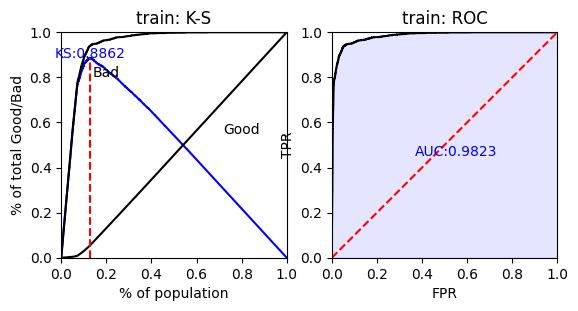

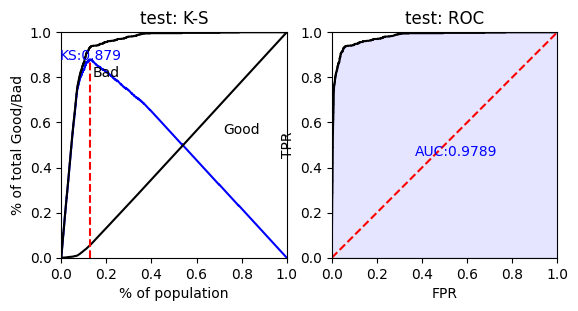

c:\Users\swift\anaconda\lib\site-packages\scorecardpy\scorecard.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)


In [417]:
# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)
# credit score
score = sc.scorecard_ply(df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [418]:
score

,owns_car_points,occupation_Drivers_points,credit_limit_used(%)_points,migrant_worker_points,net_yearly_income_points,yearly_debt_payments_points,age_points,no_of_days_employed_points,credit_limit_points,credit_score_points,gender_points,score
34126,-6.0,0.0,183.0,2.0,6.0,9.0,0.0,41.0,-1.0,208.0,13.0,1019.0
44609,-6.0,0.0,183.0,2.0,-4.0,-6.0,2.0,41.0,-1.0,208.0,13.0,996.0
44264,-6.0,0.0,-87.0,2.0,-4.0,-6.0,12.0,41.0,-1.0,-21.0,13.0,507.0
33556,12.0,0.0,183.0,2.0,-1.0,9.0,-3.0,-8.0,-1.0,208.0,13.0,978.0
28050,12.0,0.0,183.0,2.0,-4.0,9.0,-3.0,41.0,4.0,208.0,-20.0,996.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37523,-6.0,0.0,183.0,2.0,-4.0,-6.0,2.0,41.0,-1.0,208.0,13.0,996.0
36228,-6.0,0.0,183.0,2.0,-4.0,-6.0,2.0,-29.0,-2.0,208.0,13.0,925.0
32772,-6.0,0.0,183.0,2.0,-1.0,9.0,0.0,-8.0,-1.0,208.0,13.0,963.0
9762,-6.0,0.0,183.0,2.0,-4.0,-6.0,2.0,-29.0,-1.0,208.0,-20.0,893.0


(array([ 1489.,   643.,   339.,  1263.,   410.,  5085.,  3542.,   481.,
        12123.,  4625.]),
 array([ 158. ,  250.6,  343.2,  435.8,  528.4,  621. ,  713.6,  806.2,
         898.8,  991.4, 1084. ]),
 <BarContainer object of 10 artists>)

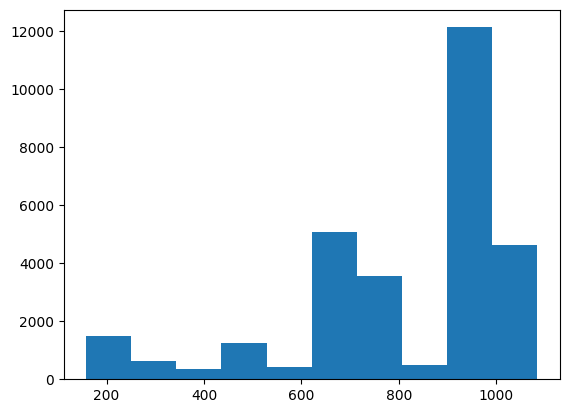

In [419]:
plt.hist(score["score"])

[[8178   83]
 [ 177  562]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8261
           1       0.87      0.76      0.81       739

    accuracy                           0.97      9000
   macro avg       0.93      0.88      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 97.11111111111111
F1_Score of TEST data: 89.82455798575646
RMSE:  0.1699673171197595
ROC AUC score:  0.8752199675046793


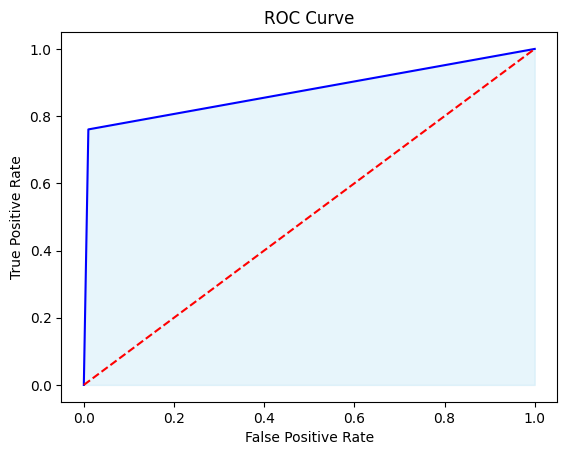

In [420]:
evaluation(lr, "Logistic Regression using WOE",X_train_woe,X_test_woe, y_test_woe)

# Sử dụng các mô hình khác nhau cho Credit Risk Analysis

In [421]:
X_train.drop(['age','migrant_worker','no_of_children'
	,'total_family_members',
	'owns_car',	
'net_yearly_income',	
'credit_limit',
'yearly_debt_payments',
'owns_house'	], axis=1, inplace=True)
X_test.drop(['age','migrant_worker','no_of_children'
	,'total_family_members',
	'owns_car',	
'net_yearly_income',	
'credit_limit',
'yearly_debt_payments',
'owns_house'	], axis=1, inplace=True)

KeyError: "['age', 'migrant_worker', 'total_family_members', 'owns_car', 'net_yearly_income', 'credit_limit', 'yearly_debt_payments', 'owns_house'] not found in axis"

## Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier()


tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

[[8103  158]
 [  93  646]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.80      0.87      0.84       739

    accuracy                           0.97      9000
   macro avg       0.90      0.93      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 97.21111111111111
F1_Score of TEST data: 91.10390041787251
RMSE:  0.16699966733167132
ROC AUC score:  0.9275141243585664


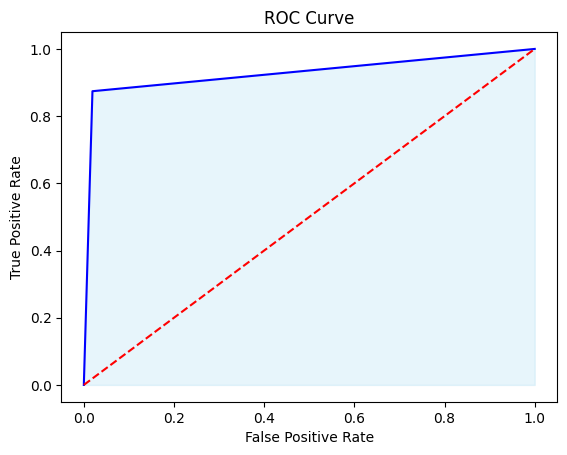

In [ ]:
# prediction
evaluation(tree_model, "Decision Tree",X_train,X_test, y_test)

## Random Forest

In [ ]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)


regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

[[8045  216]
 [  84  655]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.75      0.89      0.81       739

    accuracy                           0.97      9000
   macro avg       0.87      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.66666666666667
F1_Score of TEST data: 89.76803762330462
RMSE:  0.18257418583505536
ROC AUC score:  0.9300929633494783


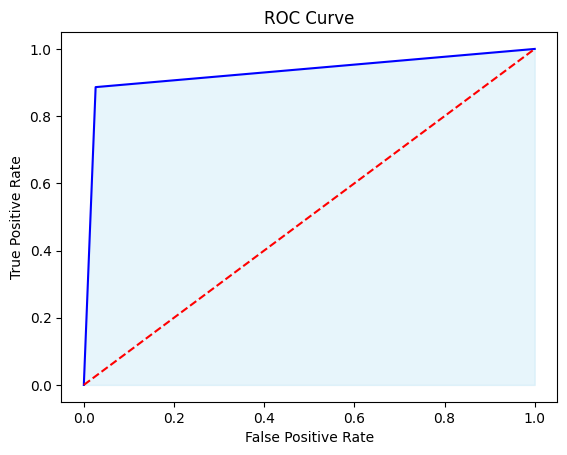

In [ ]:
# prediction
evaluation(regr_rfr, "Random Forest",X_train,X_test, y_test)

## CatBoost

In [ ]:

reg_catb = CatBoostClassifier(random_seed=42)

reg_catb.fit(X_train, y_train)

Learning rate set to 0.048998
0:	learn: 0.5425422	total: 161ms	remaining: 2m 40s
1:	learn: 0.4383391	total: 175ms	remaining: 1m 27s
2:	learn: 0.3695401	total: 184ms	remaining: 1m 1s
3:	learn: 0.3209276	total: 201ms	remaining: 50.1s
4:	learn: 0.2674035	total: 216ms	remaining: 43s
5:	learn: 0.2356123	total: 233ms	remaining: 38.5s
6:	learn: 0.1988808	total: 248ms	remaining: 35.2s
7:	learn: 0.1809145	total: 265ms	remaining: 32.9s
8:	learn: 0.1678292	total: 281ms	remaining: 31s
9:	learn: 0.1480797	total: 297ms	remaining: 29.4s
10:	learn: 0.1367100	total: 315ms	remaining: 28.3s
11:	learn: 0.1214703	total: 332ms	remaining: 27.3s
12:	learn: 0.1114141	total: 348ms	remaining: 26.4s
13:	learn: 0.1026296	total: 363ms	remaining: 25.6s
14:	learn: 0.0977264	total: 377ms	remaining: 24.8s
15:	learn: 0.0942298	total: 389ms	remaining: 23.9s
16:	learn: 0.0901750	total: 401ms	remaining: 23.2s
17:	learn: 0.0871357	total: 411ms	remaining: 22.4s
18:	learn: 0.0854180	total: 426ms	remaining: 22s
19:	learn: 0.08

[[8044  217]
 [  72  667]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.75      0.90      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.78888888888889
F1_Score of TEST data: 90.21439946040371
RMSE:  0.17919573407620817
ROC AUC score:  0.9381515178269709


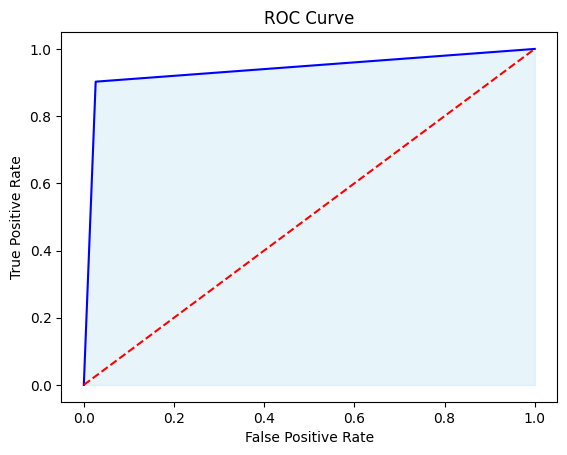

In [ ]:
# prediction
evaluation(reg_catb, "CatBoost", X_train,X_test, y_test)

## XGBoost

In [ ]:
xgb_model = XGBClassifier(random_seed=42)

xgb_model.fit(X_train, y_train)

c:\Users\swift\anaconda\lib\site-packages\xgboost\core.py:160: UserWarning: [07:58:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_seed=42, ...)

[[8016  245]
 [  66  673]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.91      0.81       739

    accuracy                           0.97      9000
   macro avg       0.86      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.54444444444444
F1_Score of TEST data: 89.66409261091187
RMSE:  0.1858912465813158
ROC AUC score:  0.9405163476622551


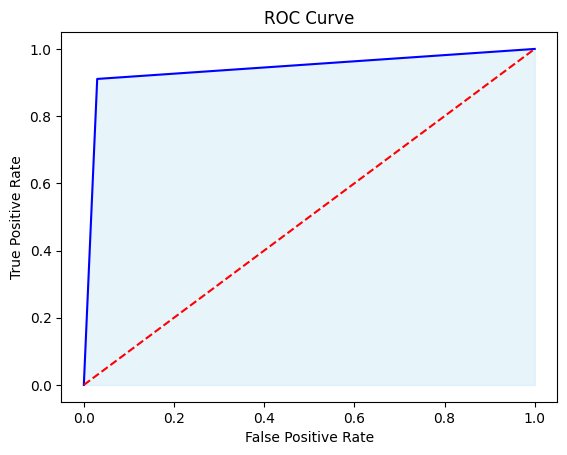

In [ ]:
# prediction
evaluation(xgb_model, "XG Boost Classifier",X_train,X_test, y_test)

In [ ]:
xgb_model.feature_importances_

array([0.01087377, 0.1461437 , 0.7214116 , 0.01301017, 0.01354718,
       0.01982909, 0.        , 0.00819964, 0.01775458, 0.0091805 ,
       0.01600096, 0.01650124, 0.00754759], dtype=float32)

In [ ]:
from xgboost import plot_importance

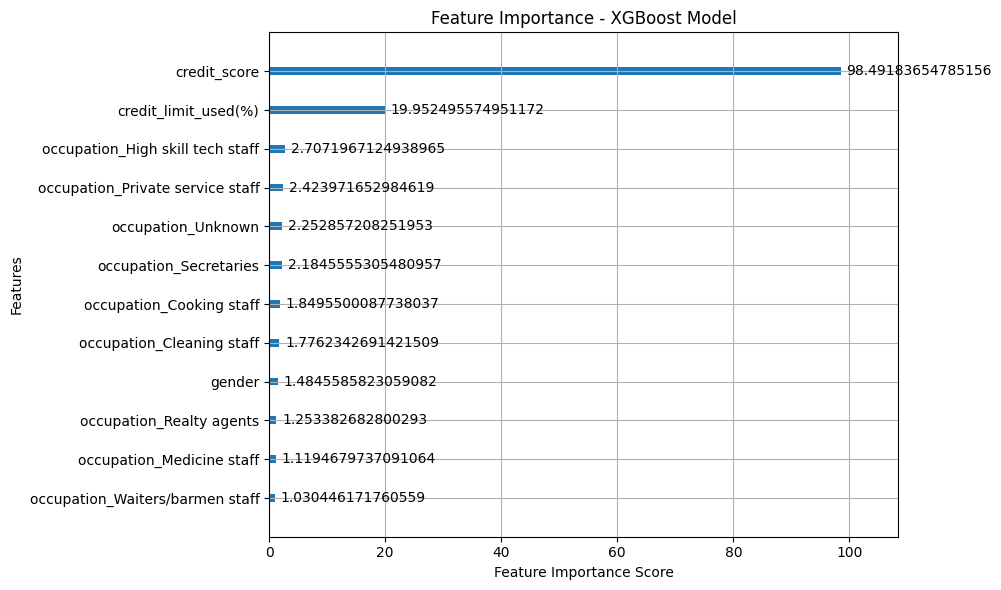

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# ... (your XGBoost model fitting logic)

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size for better readability

plot_importance(xgb_model, ax=ax, max_num_features=20, importance_type="gain",
                xlabel="Feature Importance Score", ylabel="Features",
                grid=True)  # Rotate feature labels for better visibility

plt.title("Feature Importance - XGBoost Model")
plt.tight_layout()  # Adjust spacing between elements

# Save the plot with better quality (optional)
plt.savefig("Feature_Importance.png", dpi=300)  # Higher dpi for sharper image

plt.show()


## LightGBM

In [ ]:
lgbm_model = LGBMClassifier(random_state=42)

lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19276, number of negative: 19276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 38552, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

[[8033  228]
 [  70  669]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.75      0.91      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.6888888888889
F1_Score of TEST data: 89.98188521646
RMSE:  0.18196458751941574
ROC AUC score:  0.9388389188385224


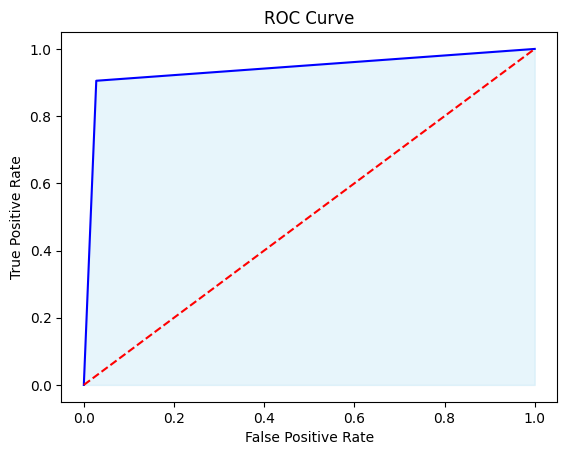

In [ ]:
# prediction
evaluation(lgbm_model, "Light GBM Classifier",X_train,X_test, y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=150,random_state=0)

ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150, random_state=0)

[[7870  391]
 [   7  732]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      8261
           1       0.65      0.99      0.79       739

    accuracy                           0.96      9000
   macro avg       0.83      0.97      0.88      9000
weighted avg       0.97      0.96      0.96      9000

Accuracy of TEST data: 95.57777777777777
F1_Score of TEST data: 88.07945274371596
RMSE:  0.21029080394116673
ROC AUC score:  0.9715984542854986


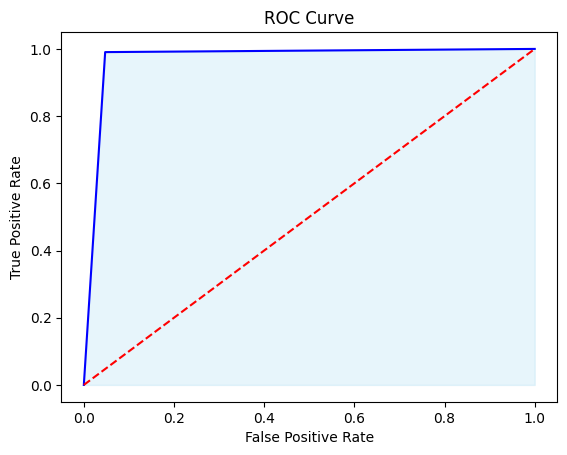

In [ ]:
evaluation(ada, "AdaBoost Classifier",X_train,X_test, y_test)

In [ ]:
final_result = pd.DataFrame(results)
final_result

,Model,Accuracy,F1 Score,AUC
0,Logistic Regression Baseline,94.500000,85.694689,0.959567
1,Logistic Regression using WOE,97.111111,89.783942,0.873372
2,Decision Tree,97.211111,91.103900,0.927514
3,Random Forest,96.666667,89.768038,0.930093
4,CatBoost,96.788889,90.214399,0.938152
5,XG Boost Classifier,96.544444,89.664093,0.940516
6,Light GBM Classifier,96.688889,89.981885,0.938839
7,AdaBoost Classifier,95.577778,88.079453,0.971598
